# <center><font color='green'> Machine Learning Application
# <center> Predicting the Market Value of FIFA football players
    
# <center>![FIFA 2019](http://www.blogproductreview.com/wp-content/uploads/2018/10/download-6.jpeg)

# Contents  
#### I. Data exploration  
    1. Data processing  
    2. Data visualization  
#### II. Information reduction  
    1. Outliers Detection
    2. Ridge and Lasso Regression 
    3. Variance Inflation Factor (VIF)  
    4. Principal Component Analysis (PCA)  
#### III. Linear regression  
    1. Cost Function  
    2. Gradient computing  
    3. Stochastic gradient descent  
    4. Scipy minimze function
    5. OLS regression from statsmodels
    6. Linear polynomiale Regression
#### IV. Tree-based Methods (NonLinear Algorithms)
    1. Variables Importances: Features Selection  
    2. Regression Trees
        2.1. Choose the best criteria and depth
        2.2. Train and evaluate the model using the best criterion and optimal depth
        2.3. Decision Tree Plot
        2.4. Trying without max_depth
    3. Random forests Regression  
        2.1. Choose the best depth
        2.2. Train and evaluate using 10-folders of cross-validation
    4. Gradient Boosting for regression using 10-folders of cross-validation
    5. Bagging Regression
        5.1. Bagging using Scikit-Learn algorithm
        5.2. Bagging implementation From Scratch: manual implement
#### V. K-Nearest Neighbors (KNN) Regression
    1. Find the optimal K-NeighborsRegressor
        1.1. Find the optimal K using KNeighborsRegressor
        1.2. Find the optimal K using GridSearchCV
    2. K-Nearest Neighbors implementation
        2.1. K-Nearest Neighbors using Scikit-Learn Algorithms
        2.2. K-Nearest Neighbors (KNN) implementation From Scratch
#### VI. Support Vector Regression (SVR)  
    1. Find the optimal Penalty parameter C of the error term the option kernel
    2. Evaluate the performance using 10-Folders of Cross-Validation
#### VII. Unsupervised Learning   
    1. K-Means Clustering  
        1.1. Find the optimal clusters using K-Means Algorithm from Scikit-Learn
        1.2. K-Means Implementation From Scratch: manual implement
        1.3. Test the K-Means Implementation function using two variables
        1.4. Aplly the algorithm on the full dataset
        1.5. Buil a function that can reseach the players how have the same characteriscs with a give player
        1.6.  K-Means provided by the sklearn.cluster Algorithm
    2. Hierarchical Clustering: an alternative of K-Means  
    3. Principal Component Analysis (PCA) for clustering   
#### VIII. Neural Network architecture using tensorflow  
    1. Build a Neural Network(NN) the model
    2. Inspect theNeural Network model
    3. Train the Neural Network model
    4. Visualize the model's training progress using the stats stored in the history object
    5. Performe the Neural Network model in order to take in account the overfiting problem
    6. Evaluation of the Neural Network model
#### IX. Models Comparison: Which is the best one ?  
    1. Split the data using Cross-Validation of 10-foldres
    2. Run the models
    3. Comparaison using plot, MAE, MSE, Score, 

# I. Data Exploration
#### Libraries

In [1]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))

# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))

# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))

# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy: 1.16.4
pandas: 0.24.2
matplotlib: 3.1.0
scipy: 1.3.0
sklearn: 0.21.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data processing 
### 1.1.Data Reading
The FIFA2019 dataset can be downloaded from [Kaggle](https://www.kaggle.com/karangadiya/fifa19)

In [3]:
#%%time
df = pd.read_csv('data.csv')
df.columns = [w.lower() for w in df.columns.str.replace(' ', '_')]

df.iloc[:5,:]

The FIFA19 dataset has 18207 observations and 89 variables



unnamed:_0      id               name  age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            photo nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  flag  overall  potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  club  ... composure marking standingtackle  slidingtackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  gkdiving  gkhandling  gkkicking  gkpositioning gkreflexes release_clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

### 1.2. Check the variables and delete those that are not useful

In [6]:
print('Fifa19 dataset has {0} observations and {1} columns'.format(df.shape[0], df.shape[1]))
print('\nThe initial columns are:')
df.columns

Fifa19 dataset has 18207 observations and 89 columns

The initial columns are:


Index(['unnamed:_0', 'id', 'name', 'age', 'photo', 'nationality', 'flag',
       'overall', 'potential', 'club', 'club_logo', 'value', 'wage', 'special',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face', 'position',
       'jersey_number', 'joined', 'loaned_from', 'contract_valid_until',
       'height', 'weight', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
       'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'crossing',
       'finishing', 'headingaccuracy', 'shortpassing', 'volleys', 'dribbling',
       'curve', 'fkaccuracy', 'longpassing', 'ballcontrol', 'acceleration',
       'sprintspeed', 'agility', 'reactions', 'balance', 'shotpower',
       'jumping', 'stamina', 'strength', 'longshots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'composure',
       'marking', 'standingtackle', 'slidingt

The informations of the positioning are available in `position` variables. So, let's remove the following columns

In [7]:
df.drop(['unnamed:_0','id','flag','club_logo','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm',
         'rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','loaned_from'], axis=1, inplace=True)

df.dropna(inplace=True)
print('After dropping the missing values and the non-usefull variables, we have {} observations and and {} variables'
      .format(df.shape[0], df.shape[1]))

After dropping the missing values and the non-usefull variables, we have 16643 observations and and 58 variables


In [11]:
print('Get information about the character variables:')
df.select_dtypes(include=['object']).info()

Get information about the character variables:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16643 entries, 0 to 18206
Data columns (total 16 columns):
name                    16643 non-null object
photo                   16643 non-null object
nationality             16643 non-null object
club                    16643 non-null object
value                   16643 non-null object
wage                    16643 non-null object
preferred_foot          16643 non-null object
work_rate               16643 non-null object
body_type               16643 non-null object
real_face               16643 non-null object
position                16643 non-null object
joined                  16643 non-null object
contract_valid_until    16643 non-null object
height                  16643 non-null object
weight                  16643 non-null object
release_clause          16643 non-null object
dtypes: object(16)
memory usage: 2.2+ MB


In [12]:
print('Get information about the non-character variables:')
df.select_dtypes(include=['int64','float64']).info()

Get information about the non-character variables:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16643 entries, 0 to 18206
Data columns (total 42 columns):
age                         16643 non-null int64
overall                     16643 non-null int64
potential                   16643 non-null int64
special                     16643 non-null int64
international_reputation    16643 non-null float64
weak_foot                   16643 non-null float64
skill_moves                 16643 non-null float64
jersey_number               16643 non-null float64
crossing                    16643 non-null float64
finishing                   16643 non-null float64
headingaccuracy             16643 non-null float64
shortpassing                16643 non-null float64
volleys                     16643 non-null float64
dribbling                   16643 non-null float64
curve                       16643 non-null float64
fkaccuracy                  16643 non-null float64
longpassing                 1664

### 1.3. Processing and creating variables.

In [13]:
df[['value','wage','release_clause','height','weight','preferred_foot']].head()

value   wage release_clause height  weight preferred_foot
0  €110.5M  €565K        €226.5M    5'7  159lbs           Left
1     €77M  €405K        €127.1M    6'2  183lbs          Right
2  €118.5M  €290K        €228.1M    5'9  150lbs          Right
3     €72M  €260K        €138.6M    6'4  168lbs          Right
4    €102M  €355K        €196.4M   5'11  154lbs          Right

- As we can see in this previous table, we have a specifics caracter in some variables. So, let's remove it! 
    - By using a function name `extract_value` – from the variables `value`, `wage`, `release_clause` – we will:
        - drop the `€`symbol,
        - Replace the letter `M` by `1 millions` and the letter `K` by `1000`,
    - Likewise, we will, replace the `'` by `.` from variable `height` and remove the `Ibs` letters from variable `height`.
- We will also create:
    - a binary variable for `preferred foot` (0 if `left`, 1 if `right`),
    - a variable named `contract_duration` for the period of contract validity.
        - If the years of expiry and start of the contract are different, this contract_duration variable takes the difference of the last two years. 
        - Otherwise, we consider the period that the player stayed in the team until 2019 (for example, if beginning 2018 and end 2018).
    - a binary variable for `position`:
        - We group all the 27 positions in 4:
            - `gk` for goal keeper
            - `df` for defense
            - `md` for midel
            - `sf` for `Forward`, `Wing` and `Striker`

In [14]:
# defining a function for cleaning the wage column

def extract_value(value):
    """
    Parameter: original value
    - Remove the € caracter
    - Replcae 'K'and 'M' respectively by 1000 and 1 million
    Return: cleaned value
    """
    out = value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in value:
        out = float(out.replace('K', ''))*1000
    return float(out)


In [15]:
# Apply the function
df['value'] = df['value'].apply(lambda x: extract_value(x))
df['wage'] = df['wage'].apply(lambda x: extract_value(x))
df['release_clause'] = df['release_clause'].astype(str).apply(lambda x: extract_value(x))

# Remove the ' symbol and the lbs letters
df['height'] = df['height'].str.replace("'", ".").astype(float)
df['weight'] = df['weight'].str.replace("lbs", "").astype(float)

# Create new variable for period of the contract
df['contract_duration'] = [i if i != 0 else j for i, j in zip(
                        df['contract_valid_until'].astype(int)-df.joined.str[-4:].astype(int),
                        2019-df.joined.str[-4:].astype(int))]

# Remove the old variables
df.drop(['contract_valid_until','joined'], axis=1, inplace=True)


In [16]:
# Check the created variables
df[['value','wage','release_clause','height','weight', 'contract_duration']].head()

value      wage  release_clause  height  weight  contract_duration
0  110500000.0  565000.0     226500000.0    5.70   159.0                 17
1   77000000.0  405000.0     127100000.0    6.20   183.0                  4
2  118500000.0  290000.0     228100000.0    5.90   150.0                  5
3   72000000.0  260000.0     138600000.0    6.40   168.0                  9
4  102000000.0  355000.0     196400000.0    5.11   154.0                  8

- `position` transformation
    * GK - Goalkeeper ==> 'gk'  
    * RB - Right Back; RWB - Right Wing Back; CB - Centre Back; LWB - Left Wing Back; LB - Left Back ==> 'df' in ['RCB','LCB','RWB','LWB','RB','LB','CB']
    * CM - Centre Mid; CDM - Centre Defensive Mid; CAM - Centre Attacking Mid; RM - Right Mid; LM - Left Mid ==> 'ml' in ['RCM','LCM','LDM','CAM','CDM','RM','LAM','LM','RDM','CM','RAM']
    * LW - Left Wing; RW - Right Wing; CF - Centre Forward; LF - Left Forward; RF - Right Forward; ST - Striker ==> sf in ['RF','LF','CF','RS','LS','ST','LW','RW']

* jersey_number =  numero du maillor. skill_moves = geste techniques

In [17]:
# Create a binary variable for position 
position = []
for p in df['position']:
    if p == 'GK':
        pos = 'gk'
    elif p in ['RCB','LCB','RWB','LWB','RB','LB','CB']:
        pos = 'df'
    elif p in ['RCM','LCM','LDM','CAM','CDM','RM','LAM','LM','RDM','CM','RAM']:
        pos = 'ml'
    elif p in ['RF','LF','CF','RS','LS','ST','LW','RW']:
        pos = 'sf'
    position.append(pos)
    
df['position0'] = position


In [18]:
# Distinguste the name of the numericals and dummies variables
num_name = df.select_dtypes(include=['int64','float64']).columns.tolist()
dum_name = pd.get_dummies(data=df.position0, prefix='position', columns='position0'
                         ).columns.tolist()+['preferred_foot','real_face']

# Create a dummies from the `position`variable
df = pd.concat([df, pd.get_dummies(data=df.position0, prefix='position', columns='position0')], axis=1)
df.drop('position0', axis=1, inplace=True)

# Create a binary variable for preferred foot and real face
df['preferred_foot'] = [1 if p=='Right' else 0 for p in df['preferred_foot']]
df['real_face'] = [1 if p=='Yes' else 0 for p in df['real_face']]


In [19]:
df.head()

name  age                                           photo  \
0           L. Messi   31  https://cdn.sofifa.org/players/4/19/158023.png   
1  Cristiano Ronaldo   33   https://cdn.sofifa.org/players/4/19/20801.png   
2          Neymar Jr   26  https://cdn.sofifa.org/players/4/19/190871.png   
3             De Gea   27  https://cdn.sofifa.org/players/4/19/193080.png   
4       K. De Bruyne   27  https://cdn.sofifa.org/players/4/19/192985.png   

  nationality  overall  potential                 club        value      wage  \
0   Argentina       94         94         FC Barcelona  110500000.0  565000.0   
1    Portugal       94         94             Juventus   77000000.0  405000.0   
2      Brazil       92         93  Paris Saint-Germain  118500000.0  290000.0   
3       Spain       91         93    Manchester United   72000000.0  260000.0   
4     Belgium       91         92      Manchester City  102000000.0  355000.0   

   special  ...  gkhandling  gkkicking  gkpositioning  gkreflexes  \
0     2202  ...        11.0       15.0           14.0         8.0   
1     2228  ...        11.0       15.0           14.0        11.0   
2     2143  ...         9.0       15.0           15.0        11.0   
3     1471  ...        85.0       87.0           88.0        94.0   
4     2281  ...        13.0        5.0           10.0        13.0   

  release_clause contract_duration  position_df position_gk  position_ml  \
0    226500000.0                17            0           0            0   
1    127100000.0                 4            0           0            0   
2    228100000.0                 5            0           0            0   
3    138600000.0                 9            0           1            0   
4    196400000.0                 8            0           0            1   

   position_sf  
0            1  
1            1  
2            1  
3            0  
4            0  

[5 rows x 61 columns]

In [20]:
df.select_dtypes(include=['int64','float64']).columns

Index(['age', 'overall', 'potential', 'value', 'wage', 'special',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'real_face', 'jersey_number', 'height', 'weight',
       'crossing', 'finishing', 'headingaccuracy', 'shortpassing', 'volleys',
       'dribbling', 'curve', 'fkaccuracy', 'longpassing', 'ballcontrol',
       'acceleration', 'sprintspeed', 'agility', 'reactions', 'balance',
       'shotpower', 'jumping', 'stamina', 'strength', 'longshots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standingtackle', 'slidingtackle', 'gkdiving',
       'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes',
       'release_clause', 'contract_duration'],
      dtype='object')

## 2. Data Visualization
- This step will help us to understand our data: the concentration, the repartitions, the distributions, … of the data.

In [22]:
# The best for a given character
players_select = ['crossing', 'finishing', 'headingaccuracy', 'shortpassing', 'volleys',
                  'dribbling', 'curve', 'fkaccuracy', 'longpassing', 'ballcontrol',
                  'acceleration', 'sprintspeed', 'agility', 'reactions', 'balance',
                  'shotpower', 'jumping', 'stamina', 'strength', 'longshots',
                  'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
                  'composure', 'marking', 'standingtackle', 'slidingtackle', 'gkdiving',
                  'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes']

i=0
while i < len(players_select):
    print('Best {0}: {1} ==> {2}'.format(players_select[i], df.loc[df[players_select[i]].idxmax()][1], df.loc[df[players_select[i]].idxmax()][0]))
    i += 1

Best crossing: 27 ==> K. De Bruyne
Best finishing: 31 ==> L. Messi
Best headingaccuracy: 35 ==> Naldo
Best shortpassing: 32 ==> L. Modrić
Best volleys: 31 ==> E. Cavani
Best dribbling: 31 ==> L. Messi
Best curve: 34 ==> Quaresma
Best fkaccuracy: 31 ==> L. Messi
Best longpassing: 28 ==> T. Kroos
Best ballcontrol: 31 ==> L. Messi
Best acceleration: 27 ==> Douglas Costa
Best sprintspeed: 19 ==> K. Mbappé
Best agility: 26 ==> Neymar Jr
Best reactions: 33 ==> Cristiano Ronaldo
Best balance: 25 ==> Bernard
Best shotpower: 33 ==> Cristiano Ronaldo
Best jumping: 33 ==> Cristiano Ronaldo
Best stamina: 27 ==> N. Kanté
Best strength: 36 ==> A. Akinfenwa
Best longshots: 31 ==> L. Messi
Best aggression: 23 ==> B. Pearson
Best interceptions: 27 ==> N. Kanté
Best positioning: 33 ==> Cristiano Ronaldo
Best vision: 31 ==> L. Messi
Best penalties: 27 ==> M. Balotelli
Best composure: 31 ==> L. Messi
Best marking: 37 ==> A. Barzagli
Best standingtackle: 33 ==> G. Chiellini
Best slidingtackle: 32 ==> Sergi

In [23]:
# Top earners
print(str(df.loc[np.argmax(df['value'])][0])+' is the most valued player with '+str(df.loc[np.argmax(df['value'])]['value'])+' €')
print(str(df.loc[np.argmax(df['wage'])][0])+' is the most remunerated player with '+str(df.loc[np.argmax(df['wage'])]['wage'])+' €')


Neymar Jr is the most valued player with 118500000.0 €
L. Messi is the most remunerated player with 565000.0 €


/Users/djibybalde/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


In [24]:
# Player with maximum Potential and Overall Performance
print(str(df.loc[df['potential'].idxmax()][0]+' has the maximum Potential: '+str(df.loc[df['potential'].idxmax()]['potential'])))
print(str(df.loc[df['overall'].idxmax()][0]+' has the maximum Overall Perforamnce: '+str(df.loc[df['overall'].idxmax()]['overall'])))

K. Mbappé has the maximum Potential: 95
L. Messi has the maximum Overall Perforamnce: 94


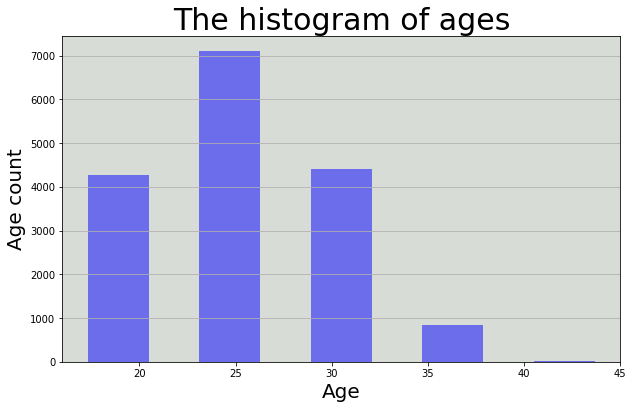

In [25]:
# plt.figure(figsize=(10,8))
fig, ax = plt.subplots(figsize=(10,6))

df.age.hist(bins=5, rwidth=0.55, alpha=0.5, color= 'blue')
plt.title('The histogram of ages' , fontsize=30)
plt.ylabel('Age count' , fontsize = 20); plt.xlabel('Age', fontsize = 20)
plt.grid(axis='x'); ax.set_facecolor('#d8dcd6')


The figure above on the "the histogram of ages" showed that most of the players are 25 years old. Some of them are 20th or 30th. A very small proportion of them are also between 40 and 55 years old.

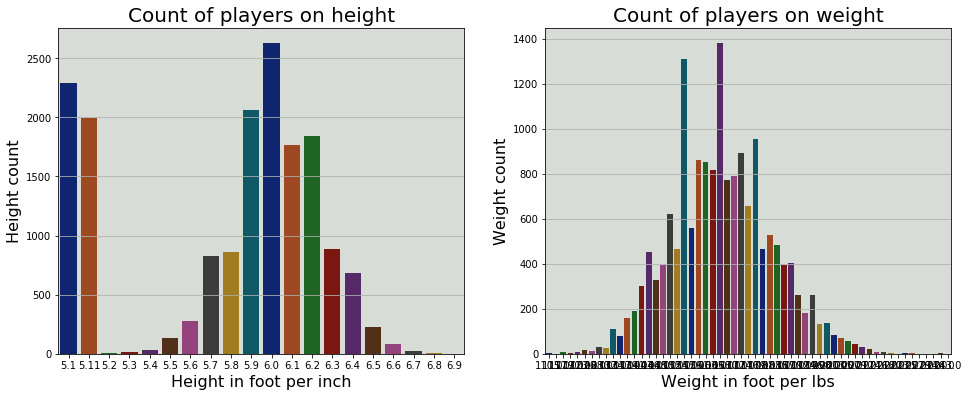

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(df.height, palette = 'dark', ax=ax1, )
ax1.set_title(label = 'Count of players on height', fontsize = 20)
ax1.set_xlabel(xlabel = 'Height in foot per inch', fontsize = 16)
ax1.set_ylabel(ylabel = 'Height count', fontsize = 16)
ax1.grid(axis='y'); ax1.set_facecolor('#d8dcd6')

sns.countplot(df.weight, palette = 'dark', ax=ax2)
ax2.set_title(label = 'Count of players on weight', fontsize = 20)
ax2.set_xlabel(xlabel = 'Weight in foot per Ibs', fontsize = 16)
ax2.set_ylabel(ylabel = 'Weight count', fontsize = 16)
ax2.grid(axis='y'); ax2.set_facecolor('#d8dcd6')


By looking the two prevous graphs, we can say that the weight variable is normaly distributed. One small proportion of the height variable is represented at left. 

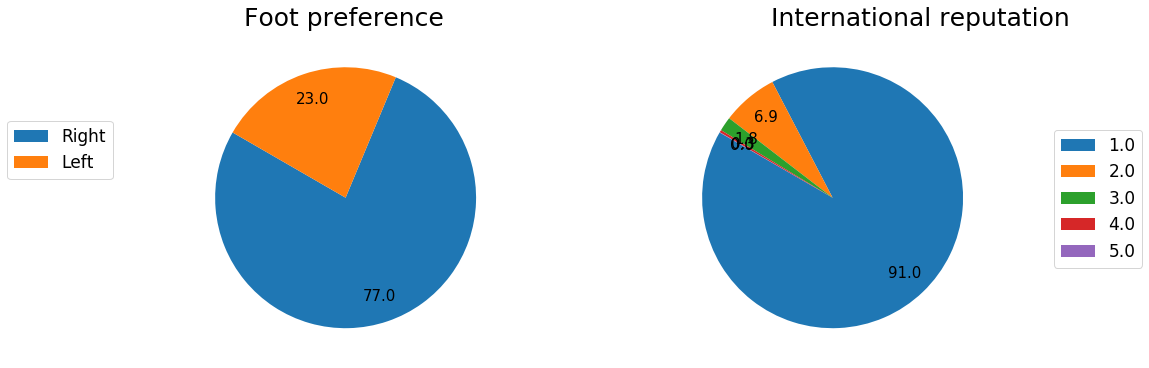

In [27]:
freq_preferred_foot  = df.preferred_foot.value_counts()
freq_preferred_foot.index = ['Right', 'Left']

freq_inter_reputation  = df.international_reputation.value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.pie(freq_preferred_foot.values,labels=None, autopct='%.1f', pctdistance=0.8, labeldistance=1, startangle=150,textprops={'fontsize': 15})
ax1.legend(freq_preferred_foot.index,bbox_to_anchor=(0,0.7), loc="upper left", fontsize=17,bbox_transform=plt.gcf().transFigure)
plt.figtext(.3,.9,'Foot preference', fontsize=25, ha='center')

ax2.pie(freq_inter_reputation.values,labels=None, autopct='%.1f', pctdistance=0.8, labeldistance=1, startangle=150,textprops={'fontsize': 15})
ax2.legend(freq_inter_reputation.index,bbox_to_anchor=(1,0.5), loc="center right", fontsize=17,bbox_transform=plt.gcf().transFigure)
plt.figtext(.8,.9,'International reputation', fontsize=25, ha='center');
plt.show()


- In this following code, we will plot all the variables to respect to the reponse variable(value) in 8*6 bocs. The scatter plot (in points) represent the couple cordonnate between a given variable and the value of the player. The line in each graph is show the relationship between the each feature and the target (here, the value of the player) variable.
- How we did it? Using a loop:
     - first, we plot one line with 6 variables into 6 graphs (using "subplots")
     - and then repeat this method by taking into account the next variables utill 8 times (the first time, we fix l=0 and and after each time we add 6 utill 8).
     - So, we have 6*8=48 graphs.

/Users/djibybalde/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/Users/djibybalde/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/Users/djibybalde/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


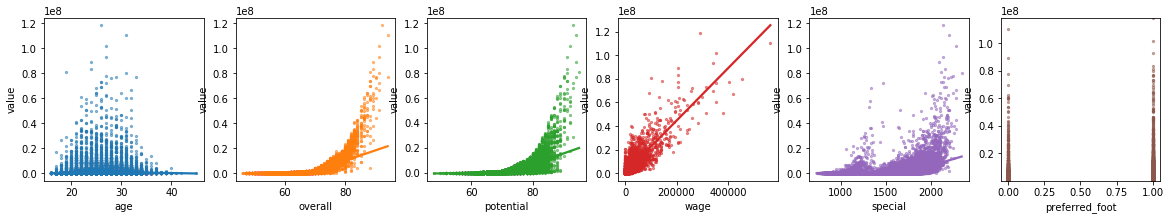

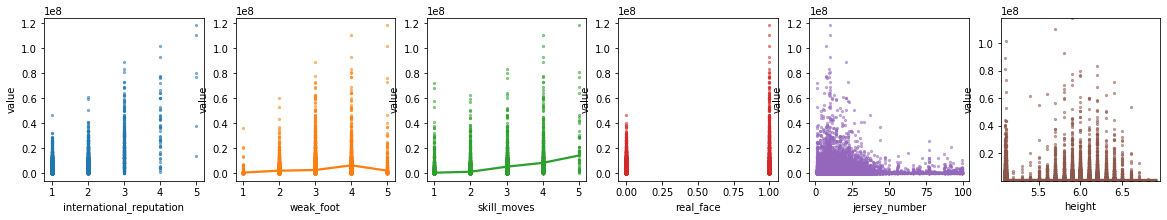

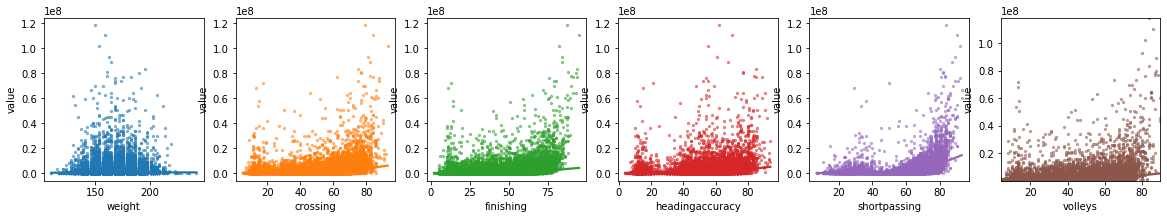

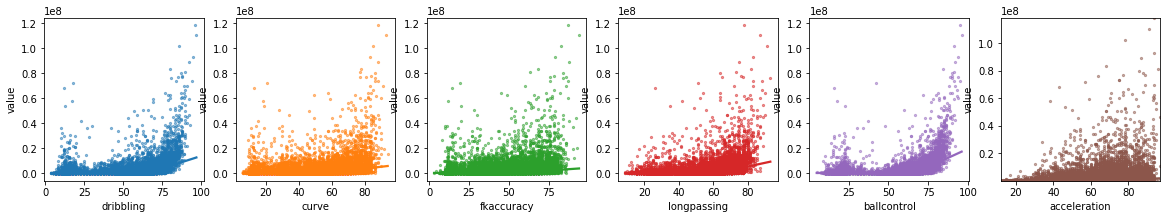

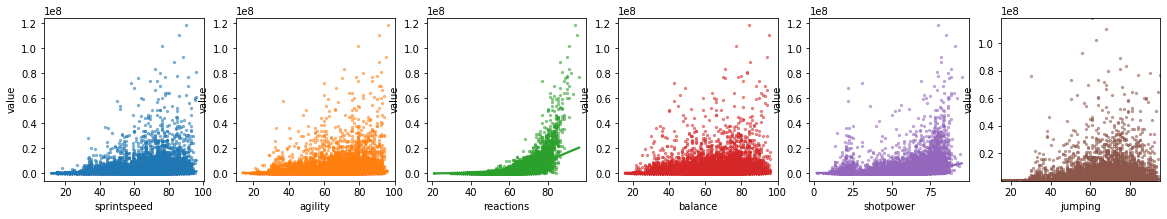

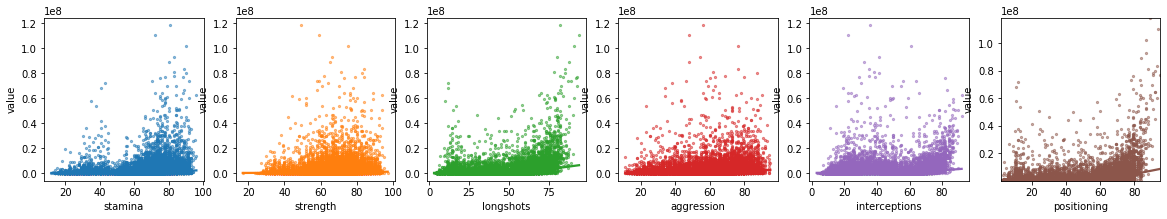

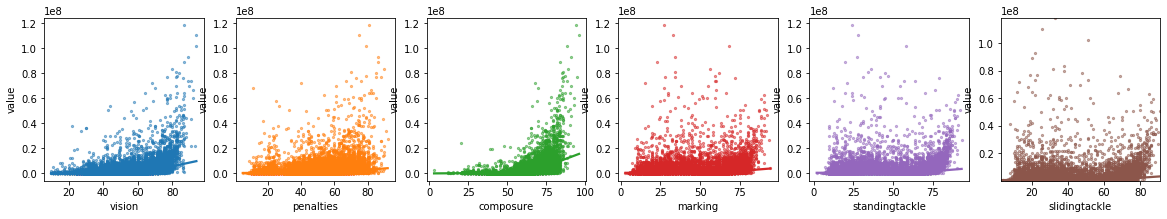

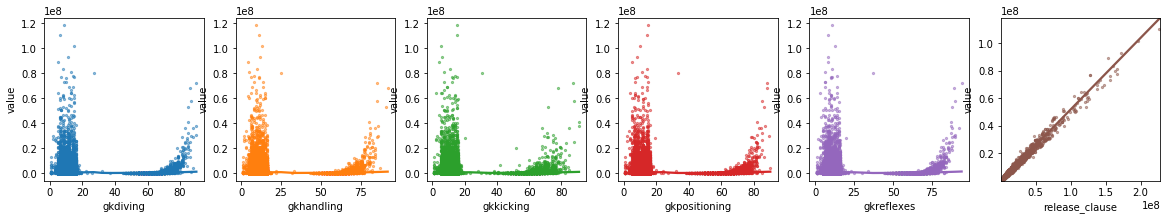

In [28]:
l = 0
for length in range(8):
    fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(20,3))
    variables = df.select_dtypes(include=['int64','float64']).drop('value', axis=1).columns.tolist()

    for i, j in zip((ax1, ax2, ax3, ax4, ax5, ax6), variables[l:l+6]):
        sns.regplot(data=df, x=j, y='value', ax=i, fit_reg=True, scatter_kws={'alpha':0.5, 's':5}, line_kws={}, lowess=True)
        plt.xlim(df[j].min()-0.05, df[j].max()+0.05)
        plt.ylim(df.value.min()-10, df.value.max()+10)
        
    l+=6

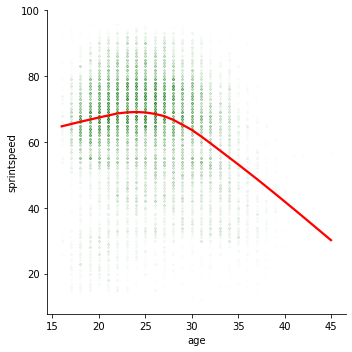

In [37]:
# Non-linearity between `age` and `sprintspeed`

sns.lmplot(data = df, x = 'age', y = 'sprintspeed',lowess=True, scatter_kws={'alpha':0.01, 's':5,'color':'green'},
           line_kws={'color':'red'})

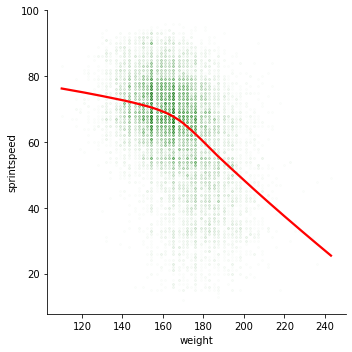

In [32]:
sns.lmplot(data = df, x = 'weight', y = 'sprintspeed',lowess=True, scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})

In [25]:
# Tcolumnsairplot graphs
#%time sns.pairplot(scaled_df.select_dtypes(include=['int64','float64']).iloc[:,:7], diag_kind="kde")
#plt.show()

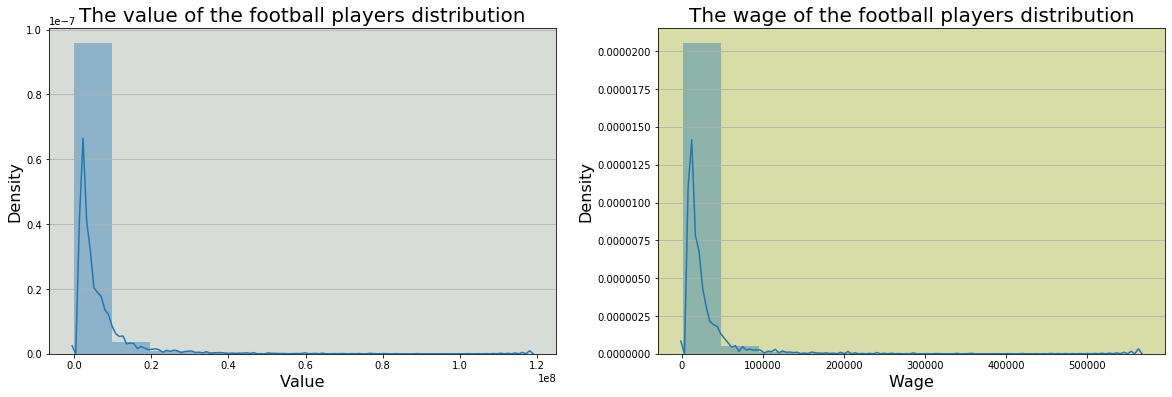

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.distplot(df.value, bins=12, ax=ax1)
ax1.set_title(label = 'The value of the football players distribution', fontsize = 20)
ax1.set_xlabel(xlabel = 'Value', fontsize = 16)
ax1.set_ylabel(ylabel = 'Density', fontsize = 16)
ax1.grid(axis='y'); ax1.set_facecolor('#d8dcd6')

sns.distplot(df.wage, bins=12, ax=ax2)
ax2.set_title(label = 'The wage of the football players distribution', fontsize = 20)
ax2.set_xlabel(xlabel = 'Wage', fontsize = 16)
ax2.set_ylabel(ylabel = 'Density', fontsize = 16)
ax2.grid(axis='y'); ax2.set_facecolor('#d8dca6')


- This two graphs show that the density of the **`value`** and the **`wage`** of the players have same distribution. This `"distribution"` is very `"concentrated on the left"`. This means that there is a very large difference in salary and value between players: compared to others, some players have a very high salary. This can be explained by the income of Messi, Cristiano, Neymar for example who have very high value and wage.
- In some cases, we can consider it as an outliers. In this study, we support that this values are normal (the reallity): for more details, check the `Information Reduction` part.

In [39]:
df[['wage','value']].describe()

wage         value
count   16643.000000  1.664300e+04
mean     9618.037613  2.442667e+06
std     22263.518927  5.720629e+06
min      1000.000000  1.000000e+04
25%      1000.000000  3.000000e+05
50%      3000.000000  6.750000e+05
75%      8000.000000  2.000000e+06
max    565000.000000  1.185000e+08

### Descriptive statistics

In [40]:
df.describe()

age       overall     potential         value           wage  \
count  16643.000000  16643.000000  16643.000000  1.664300e+04   16643.000000   
mean      25.226221     66.162771     71.140900  2.442667e+06    9618.037613   
std        4.716588      7.008236      6.151409  5.720629e+06   22263.518927   
min       16.000000     46.000000     48.000000  1.000000e+04    1000.000000   
25%       21.000000     62.000000     67.000000  3.000000e+05    1000.000000   
50%       25.000000     66.000000     71.000000  6.750000e+05    3000.000000   
75%       29.000000     71.000000     75.000000  2.000000e+06    8000.000000   
max       45.000000     94.000000     95.000000  1.185000e+08  565000.000000   

            special  preferred_foot  international_reputation     weak_foot  \
count  16643.000000    16643.000000              16643.000000  16643.000000   
mean    1595.383404        0.770474                  1.114823      2.942919   
std      275.723076        0.420541                  0.398559      0.659933   
min      731.000000        0.000000                  1.000000      1.000000   
25%     1452.000000        1.000000                  1.000000      3.000000   
50%     1633.000000        1.000000                  1.000000      3.000000   
75%     1787.000000        1.000000                  1.000000      3.000000   
max     2346.000000        1.000000                  5.000000      5.000000   

        skill_moves  ...    gkhandling     gkkicking  gkpositioning  \
count  16643.000000  ...  16643.000000  16643.000000   16643.000000   
mean       2.349516  ...     16.515712     16.355765      16.503936   
std        0.755855  ...     17.033907     16.615668      17.151713   
min        1.000000  ...      1.000000      1.000000       1.000000   
25%        2.000000  ...      8.000000      8.000000       8.000000   
50%        2.000000  ...     11.000000     11.000000      11.000000   
75%        3.000000  ...     14.000000     14.000000      14.000000   
max        5.000000  ...     92.000000     91.000000      90.000000   

         gkreflexes  release_clause  contract_duration   position_df  \
count  16643.000000    1.664300e+04       16643.000000  16643.000000   
mean      16.837409    4.585061e+06           3.795169      0.326744   
std       18.090985    1.111872e+07           2.348354      0.469037   
min        1.000000    1.300000e+04           1.000000      0.000000   
25%        8.000000    5.250000e+05           2.000000      0.000000   
50%       11.000000    1.100000e+06           3.000000      0.000000   
75%       14.000000    3.500000e+06           5.000000      1.000000   
max       94.000000    2.281000e+08          30.000000      1.000000   

        position_gk   position_ml   position_sf  
count  16643.000000  16643.000000  16643.000000  
mean       0.114162      0.376194      0.182900  
std        0.318018      0.484444      0.386596  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        0.000000      1.000000      0.000000  
max        1.000000      1.000000      1.000000  

[8 rows x 54 columns]

- As the graphs and the descriptive statistics show, there is a large difference between the wages and the values of the football players.
- Let's with the `IsolationForest` function

# II. Information reduction methods
- Use Machine Learning techiniques to reduce the dimension of the data
    - to keep the most important variables
    - to delect the variables that have or containt the same informations with the best one
    - …
- Methods
    - Outliers
    - `Ridge` and `Lasso` regressio
    - Principal Component Analyseis (PCA)
- Methodologies
    - First, split the data in two samples: train (80% of the observations) and test
    - Apply the the `Lasso` algorithm using `Cross-Validation` to get the best `alpha`
    - Apply the `VIF` method with the `Lasso` final results (selected variables)

## 1. Outliers detection
- **`Note that`**, we will not delect the outlirs because their are interesting. We will juste identified its on the data

### 1.1. Outliers detection using quantils methods

In [46]:
def detecting_outliers(x):
    
    inf_bound = x.loc['25%']-5*(x.loc['75%']-x.loc['25%'])
    sup_bound = x.loc['25%']+5*(x.loc['75%']-x.loc['25%'])

    return inf_bound,sup_bound

var_stats = df.describe().columns
stats = df[var_stats].describe(percentiles = [0.05,0.25,0.50,0.75,0.95])

index = ['inf_bound','sup_bound']
df_stats = pd.DataFrame({'index': index})

for j in var_stats:
    values = pd.DataFrame(np.round(detecting_outliers(stats[j]),3))[0]
    var_name = str(j)
    df_stats[var_name] = values

bound = []
for j in var_stats:
    bound.append(np.array(np.round(detecting_outliers(stats[j]),3)))

df_stats = df_stats.set_index('index')
df_stats

age  overall  potential      value     wage  special  \
index                                                              
inf_bound -19.0     17.0       27.0 -8200000.0 -34000.0   -223.0   
sup_bound  61.0    107.0      107.0  8800000.0  36000.0   3127.0   

           preferred_foot  international_reputation  weak_foot  skill_moves  \
index                                                                         
inf_bound             1.0                       1.0        3.0         -3.0   
sup_bound             1.0                       1.0        3.0          7.0   

           ...  gkhandling  gkkicking  gkpositioning  gkreflexes  \
index      ...                                                     
inf_bound  ...       -22.0      -22.0          -22.0       -22.0   
sup_bound  ...        38.0       38.0           38.0        38.0   

           release_clause  contract_duration  position_df  position_gk  \
index                                                                    
inf_bound     -14350000.0              -13.0         -5.0          0.0   
sup_bound      15400000.0               17.0          5.0          0.0   

           position_ml  position_sf  
index                                
inf_bound         -5.0          0.0  
sup_bound          5.0          0.0  

[2 rows x 54 columns]

In [47]:
pd.concat([df[var_stats].aggregate(['min','max']), df_stats])

age  overall  potential        value      wage  special  \
min        16.0     46.0       48.0      10000.0    1000.0    731.0   
max        45.0     94.0       95.0  118500000.0  565000.0   2346.0   
inf_bound -19.0     17.0       27.0   -8200000.0  -34000.0   -223.0   
sup_bound  61.0    107.0      107.0    8800000.0   36000.0   3127.0   

           preferred_foot  international_reputation  weak_foot  skill_moves  \
min                   0.0                       1.0        1.0          1.0   
max                   1.0                       5.0        5.0          5.0   
inf_bound             1.0                       1.0        3.0         -3.0   
sup_bound             1.0                       1.0        3.0          7.0   

           ...  gkhandling  gkkicking  gkpositioning  gkreflexes  \
min        ...         1.0        1.0            1.0         1.0   
max        ...        92.0       91.0           90.0        94.0   
inf_bound  ...       -22.0      -22.0          -22.0       -22.0   
sup_bound  ...        38.0       38.0           38.0        38.0   

           release_clause  contract_duration  position_df  position_gk  \
min               13000.0                1.0          0.0          0.0   
max           228100000.0               30.0          1.0          1.0   
inf_bound     -14350000.0              -13.0         -5.0          0.0   
sup_bound      15400000.0               17.0          5.0          0.0   

           position_ml  position_sf  
min                0.0          0.0  
max                1.0          1.0  
inf_bound         -5.0          0.0  
sup_bound          5.0          0.0  

[4 rows x 54 columns]

### 1.2. Outliers detection using `IsolationForest` function (from Scikit-Learn) 

> - The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.
> - Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.
> -This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.
> - Random partitioning produces noticeable shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies. Source: [Scikit_learn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py)

# <center> ![IsolationForest](https://scikit-learn.org/stable/_images/sphx_glr_plot_isolation_forest_001.png)

In [48]:
from sklearn.ensemble import IsolationForest
np.random.seed(1)

# outlier_detection = DBSCAN(min_samples = 10, eps = 3)

outlier_detection = IsolationForest(behaviour='new', max_samples=df.shape[0], random_state=0, contamination='auto')
outlier = outlier_detection.fit_predict(df[var_stats])

print('The data has {} outliers points'.format(list(outlier).count(-1)))


The data has 302 outliers points


In [49]:
df0 = df.copy()

df0['outlier'] = outlier
df0[['name']+var_stats.tolist()].loc[df0.outlier==-1].head()

name  age  overall  potential        value      wage  special  \
0           L. Messi   31       94         94  110500000.0  565000.0     2202   
1  Cristiano Ronaldo   33       94         94   77000000.0  405000.0     2228   
2          Neymar Jr   26       92         93  118500000.0  290000.0     2143   
3             De Gea   27       91         93   72000000.0  260000.0     1471   
4       K. De Bruyne   27       91         92  102000000.0  355000.0     2281   

   preferred_foot  international_reputation  weak_foot  ...  gkhandling  \
0               0                       5.0        4.0  ...        11.0   
1               1                       5.0        4.0  ...        11.0   
2               1                       5.0        5.0  ...         9.0   
3               1                       4.0        3.0  ...        85.0   
4               1                       4.0        5.0  ...        13.0   

   gkkicking  gkpositioning  gkreflexes  release_clause  contract_duration  \
0       15.0           14.0         8.0     226500000.0                 17   
1       15.0           14.0        11.0     127100000.0                  4   
2       15.0           15.0        11.0     228100000.0                  5   
3       87.0           88.0        94.0     138600000.0                  9   
4        5.0           10.0        13.0     196400000.0                  8   

   position_df  position_gk  position_ml  position_sf  
0            0            0            0            1  
1            0            0            0            1  
2            0            0            0            1  
3            0            1            0            0  
4            0            0            1            0  

[5 rows x 55 columns]

- Because this is very relevant informations, therefore, dropping this data means the deletion of an important part of the data that may be useful in the analysis. But their can also impact our model. So, how to do ?
    - First:, we run the models with the outliers, second: without the outliers observations and than we compare the results. We that the results are quite similar. Hence we decided to not delet this corresponding obsevations.

In [50]:
#df[num_name+dum_name].to_csv('gets_df.csv', index=False)

## Normalisation
- Before using `Machine Learning` techniques, we standardize our data using the `standard` method. So, we will remove the mean and reduces the variance to unity using a function.
* Befor the normalizatio, we would like to create new variable name `age2`. Like salary, the value of a player varies considerably according to age. The salary, the value must increase with age before decreasing from a given moment. This can be explained by a person's performance or productivity according to his age.

In [51]:
def normalize(x):
    """
    Standardize features by removing the mean and scaling to unit variance
    We get the same result when we use the Sklern function: StandardScaler()
    """
    scaled_x = (x-x.mean(axis=0))/x.std(axis=0)
    return scaled_x


In [52]:
# Add the `age^2`variable in the dataset
df0['age2'] = df0['age']**2
num_name = num_name+['age2']

# Normalize the data
scaled_df = normalize(df0[num_name])


In [53]:
"""# Or we can also use the Scikit Learn function:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df.drop('preferred_foot', axis=1).select_dtypes(include=['int64','float64']))
scaler_df = pd.DataFrame(scaler.transform(df.drop('preferred_foot', 
                                                  axis=1).select_dtypes(include=['int64','float64'])),
                         columns=df.drop('preferred_foot', axis=1).select_dtypes(include=['int64','float64']).columns)
scaler_df.head()"""

"# Or we can also use the Scikit Learn function:\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler = scaler.fit(df.drop('preferred_foot', axis=1).select_dtypes(include=['int64','float64']))\nscaler_df = pd.DataFrame(scaler.transform(df.drop('preferred_foot', \n                                                  axis=1).select_dtypes(include=['int64','float64'])),\n                         columns=df.drop('preferred_foot', axis=1).select_dtypes(include=['int64','float64']).columns)\nscaler_df.head()"

### Split the data in train and test sample

In [54]:
from sklearn.model_selection import train_test_split

ir_df = pd.concat([scaled_df, df[dum_name]], axis=1)
ir_df['constant'] = 1

X_train, X_test, y_train, y_test = train_test_split(ir_df.drop(['value',], axis=1),
                                                    ir_df.value,
                                                    test_size=0.2, random_state=0)

print('Our train and test samples have respectively {} and {} observations'.format(
    X_train.shape[0],X_test.shape[0]))

Our train and test samples have respectively 13314 and 3329 observations


## 2. Ridge and Lasso Regression
- Also known as Linear least squares with l2 regularization or Tikhonov regularization, **`Ridge Regression`** is a technique for analyzing multiple regression data that suffer from multicollinearity.

> "**`Lasso`** (least absolute shrinkage and selection operator) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces". [Wikipedia](https://en.wikipedia.org/wiki/Lasso_(statistics))  

> "Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression." [Saptashwa Bhattacharyya](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)  

- The Ridge method tries to minimizes the objective function: $||y - Xw||^2_2 + \lambda||w||^2_2$ or $||y - Xw||_2 + \lambda||w||_2$
    - The Ridge coefficient can be rewritten as $\beta_{\lambda}^{Ridge} = (X'X+\lambda{I_N})^{-1}X'y$
    - $\lambda$ also called $\alpha$ in the [Scikit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) library make the problem convex.
- Similary, the Lasso regression coefficient can be written as ${\displaystyle \beta_{\lambda}^{Lasso} = \text{argmin}_{\beta∈{R^N}}\sum_{t=1}^{T}\left\{y_{t}-\sum_{j=1}^{N}\beta_{j}x_{j,t}\right\}^{2}+\lambda\sum_{j=1}^{N}|\beta_{j}|}$

- The penalty term (regularization strength) is $L_2$ for Ridge and $L_1$ for Lasso regression.


In [55]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### 2.1. Use Cross-Validation method in oredr to get the best `alpha`
- Train a Lasso linear model with cross-validation generator with `100 folds` and 10,000,000 iterations 
- As we alread normalize the data, we will not normalize use the `normalize` function (subtracting the mean and dividing by the l2-norm on Lasso for example).

#### 2.1.1. Ridge Cross-Validation method

In [56]:
ridgecv = RidgeCV(cv=100, normalize=False)
ridgecv.fit(X_train, y_train)
print('The alpha value choosed by Ridge CV regression with 100-folds is:', ridgecv.alpha_)


The alpha value choosed by Ridge CV regression with 100-folds is: 10.0


#### 2.1.2. Lasso Cross-Validation method

In [57]:
lassocv = LassoCV(alphas=None, cv=100, max_iter=10000000, normalize=False)
lassocv.fit(X_train, y_train)
print('The alpha value choosed by Lasso CV regression with 100-folds is:', lassocv.alpha_)


The alpha value choosed by Lasso CV regression with 100-folds is: 0.00101194224239343


### 2.2. Train and evalute the Ridge and Lasso model
#### 2.2.1. Ridge model

In [58]:
# Training
ridgeCV = Ridge(alpha=ridgecv.alpha_, max_iter=1000000, normalize=False)
ridgeCV.fit(X_train, y_train)

# Predicting
pred_ridgeCV = ridgeCV.predict(X_test)

# Campute the scores
train_score_ridgeCV = ridgeCV.score(X_train,y_train)
test_score_ridgeCV = ridgeCV.score(X_test,y_test)
coeff_used_ridgeCV = np.sum(ridgeCV.coef_!=0)

# Measure the performance of the lassoCV Regression
mae_ridgeCV = mean_absolute_error(y_test, pred_ridgeCV)
mse_ridgeCV = mean_squared_error(y_test, pred_ridgeCV)
r2_ridgeCV = r2_score(y_test, pred_ridgeCV)

# print(pd.Series(lassoCV.coef_, index = X_train.columns.values)) # Print coefficients
print('RidgeCV MAE:', mae_ridgeCV)
print('RidgeCV MSE:', mse_ridgeCV)
print('RidgeCV R^2:', r2_ridgeCV)
print()
print('RidgeCV train Score:', train_score_ridgeCV)
print('RidgeCV test Score:', test_score_ridgeCV)
print('RidgeCV Regressors:', coeff_used_ridgeCV)

RidgeCV MAE: 0.04507339419056483
RidgeCV MSE: 0.010180276541321377
RidgeCV R^2: 0.9889794971408513

RidgeCV train Score: 0.990414301912324
RidgeCV test Score: 0.9889794971408513
RidgeCV Regressors: 54


In [59]:
# Ridge Coefficients
print(pd.Series(ridgeCV.coef_, index = X_train.columns.values)) # Print coefficients

age                         0.025524
overall                     0.033163
potential                  -0.012377
wage                        0.033649
special                    -0.004998
international_reputation    0.029986
weak_foot                   0.001511
skill_moves                 0.002265
jersey_number              -0.001600
height                     -0.000519
weight                      0.001413
crossing                   -0.005902
finishing                  -0.009751
headingaccuracy            -0.004537
shortpassing               -0.005204
volleys                     0.011875
dribbling                  -0.004009
curve                      -0.004848
fkaccuracy                  0.005354
longpassing                 0.006198
ballcontrol                -0.003099
acceleration                0.002059
sprintspeed                -0.001050
agility                     0.001894
reactions                   0.003817
balance                     0.000095
shotpower                  -0.001966
j

#### 2.2.2. Lasso model

In [60]:
# Training
lassoCV = Lasso(alpha=lassocv.alpha_, max_iter=1000000, normalize=False)
lassoCV.fit(X_train, y_train)

# Predicting
pred_lassoCV = lassoCV.predict(X_test)

# Campute the scores
train_score_lassoCV = lassoCV.score(X_train,y_train)
test_score_lassoCV = lassoCV.score(X_test,y_test)
coeff_used_lassoCV = np.sum(lassoCV.coef_!=0)

# Measure the performance of the lassoCV Regression
mae_lassoCV = mean_absolute_error(y_test, pred_lassoCV)
mse_lassoCV = mean_squared_error(y_test, pred_lassoCV)
r2_lassoCV = r2_score(y_test,pred_lassoCV)

# print(pd.Series(lassoCV.coef_, index = X_train.columns.values)) # Print coefficients
print('LassoCV MAE:', mae_lassoCV)
print('LassoCV MSE:', mse_lassoCV)
print('LassoCV R^2:', r2_lassoCV)
print()
print('LassoCV train Score:', train_score_lassoCV)
print('LassoCV test Score:', test_score_lassoCV)
print('LassoCV Regressors:', coeff_used_lassoCV)

LassoCV MAE: 0.04387465663863494
LassoCV MSE: 0.010233026618174974
LassoCV R^2: 0.9889223933509469

LassoCV train Score: 0.9902750070470857
LassoCV test Score: 0.9889223933509469
LassoCV Regressors: 18


#### 2.2.3. Extract the Lasso variables without null coefficients from the Lasso Regression

In [61]:
# Store the coefs in a DataFrame
lasso_coefs = pd.DataFrame(lassoCV.coef_, index = X_train.columns.values, columns=['lasso_coefficients'])

# select the variables with non null coefs
lasso_coefs.loc[lasso_coefs.lasso_coefficients!=0]

lasso_regressors = lasso_coefs.loc[lasso_coefs.lasso_coefficients!=0].index.tolist()
print('The variables that are chosen by Lasso are:\n', lasso_regressors)
print(); print('There are', len(lasso_regressors))


The variables that are chosen by Lasso are:
 ['overall', 'potential', 'wage', 'international_reputation', 'weak_foot', 'jersey_number', 'weight', 'crossing', 'finishing', 'headingaccuracy', 'volleys', 'reactions', 'stamina', 'standingtackle', 'slidingtackle', 'release_clause', 'age2', 'real_face']

There are 18


In [62]:
lasso_coefs.loc[lasso_coefs.lasso_coefficients!=0]

lasso_coefficients
overall                             0.020627
potential                          -0.005248
wage                                0.029118
international_reputation            0.026356
weak_foot                           0.000505
jersey_number                      -0.001237
weight                              0.000233
crossing                           -0.001550
finishing                          -0.000282
headingaccuracy                    -0.000658
volleys                             0.001303
reactions                           0.001962
stamina                             0.008772
standingtackle                     -0.000110
slidingtackle                      -0.007240
release_clause                      0.944492
age2                               -0.002713
real_face                          -0.023343

### 2.2.4. Other method: 
- Choose a lot of value of alpha (called alsso lamda) and run the model for each value
- Store the value in table and plot 

In [64]:
# Here "alphas" is equal to "lambda" 
alphas = 10**np.linspace(5,-2,200)*0.2
print("The minimun and maximun values of alphas are respectively:", alphas.min(), ',', alphas.max())

The minimun and maximun values of alphas are respectively: 0.002 , 20000.0


In [65]:
# Ridge Regression with intercept
ridge = Ridge(normalize = True, fit_intercept=True, solver='auto', random_state=0, max_iter = 1000000)

ridge_coefs = [] 
ridge_df = pd.DataFrame({'variable': X_train.columns.values})
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)
    
    var_name = 'alpha' + str(np.round(a,3))
    ridge_df[var_name] = ridge.coef_
    
ridge_df = ridge_df.set_index('variable').T
ridge_df.tail()

variable         age   overall  potential      wage   special  \
alpha0.006  0.005462  0.039171  -0.013683  0.047415 -0.003133   
alpha0.005  0.006853  0.038572  -0.013776  0.045149 -0.003210   
alpha0.004  0.009843  0.037453  -0.013795  0.041507 -0.003384   
alpha0.003  0.013074  0.036419  -0.013638  0.038813 -0.003598   
alpha0.002  0.015599  0.035692  -0.013438  0.037270 -0.003795   

variable    international_reputation  weak_foot  skill_moves  jersey_number  \
alpha0.006                  0.032375   0.001670     0.003100      -0.002072   
alpha0.005                  0.031965   0.001643     0.002945      -0.001999   
alpha0.004                  0.031318   0.001600     0.002699      -0.001883   
alpha0.003                  0.030851   0.001569     0.002519      -0.001795   
alpha0.002                  0.030590   0.001552     0.002418      -0.001743   

variable      height  ...  release_clause  contract_duration      age2  \
alpha0.006 -0.000516  ...        0.917554           0.000535 -0.020736   
alpha0.005 -0.000516  ...        0.921079           0.000472 -0.021508   
alpha0.004 -0.000515  ...        0.926717           0.000371 -0.023409   
alpha0.003 -0.000514  ...        0.930866           0.000298 -0.025708   
alpha0.002 -0.000513  ...        0.933233           0.000256 -0.027617   

variable    position_df  position_gk  position_ml  position_sf  \
alpha0.006    -0.008212     0.045958    -0.007601    -0.006893   
alpha0.005    -0.008412     0.046902    -0.007793    -0.006931   
alpha0.004    -0.008747     0.048505    -0.008116    -0.007005   
alpha0.003    -0.009005     0.049754    -0.008368    -0.007070   
alpha0.002    -0.009154     0.050488    -0.008515    -0.007110   

variable    preferred_foot  real_face  constant  
alpha0.006       -0.000722  -0.042338       0.0  
alpha0.005       -0.000695  -0.042250       0.0  
alpha0.004       -0.000649  -0.042096       0.0  
alpha0.003       -0.000613  -0.041973       0.0  
alpha0.002       -0.000592  -0.041899       0.0  

[5 rows x 55 columns]

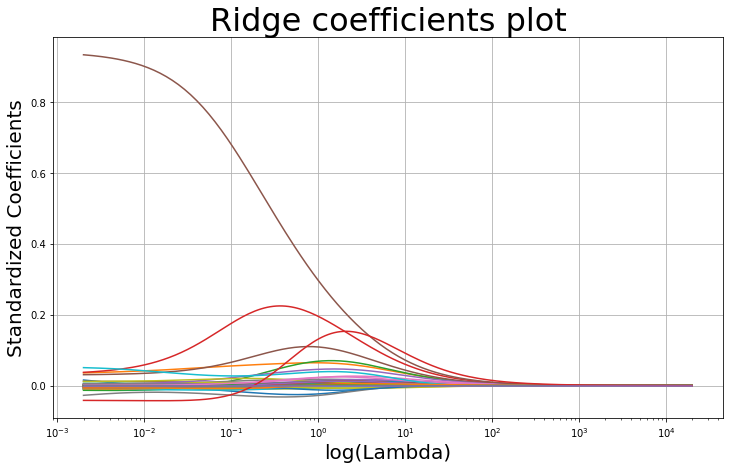

In [66]:
plt.subplots(figsize=(12, 7))
ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log'); plt.axis('tight')
plt.xlabel('log(Lambda)', fontsize=20)
plt.ylabel('Standardized Coefficients', fontsize=20)
plt.title('Ridge coefficients plot', fontsize=32)
plt.grid(); plt.show()

## 3. Use Variance Inflation Factor (VIF) For `detecting multicollinearity` and `selecting variables`
- The **`VIF`** is a measure of the multicollinearity of the variables in a multiple regression model. Mathematically, the VIF is the invers of the of the tolerance which is the difference between 1 and the `coefficient of determination` ($R^2$).    
- Implementation of the VIF:
    - First, define the Ordinary Least Square regression formular (identifie the features (X) and the target (y = value) variables).
    - Run an OLS regression that has $X_i$ as a function of all the other explanatory variables in the first equation.  
        - For example, if i=1: ${\displaystyle X_{1}=\alpha_{0}+\alpha_{2}X_{2}+\alpha_{3}X_{3}+\cdots +\alpha_{k}X_{k}+e}$  
            - wher $\alpha_{0}$ is a constant and e is an error term
    - Campute the VIF for $\hat{\alpha_{i}}$ using the following formula:
        - $VIF$ = $\frac{1}{tolerance}$ = $\frac{1}{1-R_j^2}$   
            - where $R_{{j}}^{2}$ is the coefficient of determination of a regression of explanator j on all the other explanators.
    - And finally, analyze the VIF by considering that `multicollinearity` is very high when $VIF(\hat{\beta{i}})$ > 10.   
    
`Referencs`: [Stephanie](https://www.statisticshowto.datasciencecentral.com/variance-inflation-factor/), [Wikipedia](https://en.wikipedia.org/wiki/Variance_inflation_factor)

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = ir_df[lasso_regressors].copy()
y = ir_df['value']
independent_variables = X.columns.tolist()

In [68]:
# Fix the maximum value of VIF
thresh = 10

for i in np.arange(0,len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix) for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print()
        print("vif:", vif)
        print ('Dropping \'' + X[independent_variables].columns[maxloc] + '\' at index: ' + str(maxloc))
        del independent_variables[maxloc]
    else:
        break

print(); print("Final 'independent_variables':\n", independent_variables)
print(); print('By setteing thresh = {}, we end up with {} regressors.'.format(thresh, len(independent_variables)))



vif: [9.440016125904885, 4.908349566122425, 4.349236820658655, 2.1927944744537085, 1.173218412721127, 1.1145518686483613, 1.5681614467557403, 3.739882388713517, 6.4262084951680585, 2.8612198273931484, 5.476532144611312, 3.915015232027415, 3.026736180876603, 21.637673914758786, 21.610853113756214, 4.757664388405197, 3.5990168620851444, 1.3909925928395566]
Dropping 'standingtackle' at index: 13

Final 'independent_variables':
 ['overall', 'potential', 'wage', 'international_reputation', 'weak_foot', 'jersey_number', 'weight', 'crossing', 'finishing', 'headingaccuracy', 'volleys', 'reactions', 'stamina', 'slidingtackle', 'release_clause', 'age2', 'real_face']

By setteing thresh = 10, we end up with 17 regressors.


### Check the correlation matrix

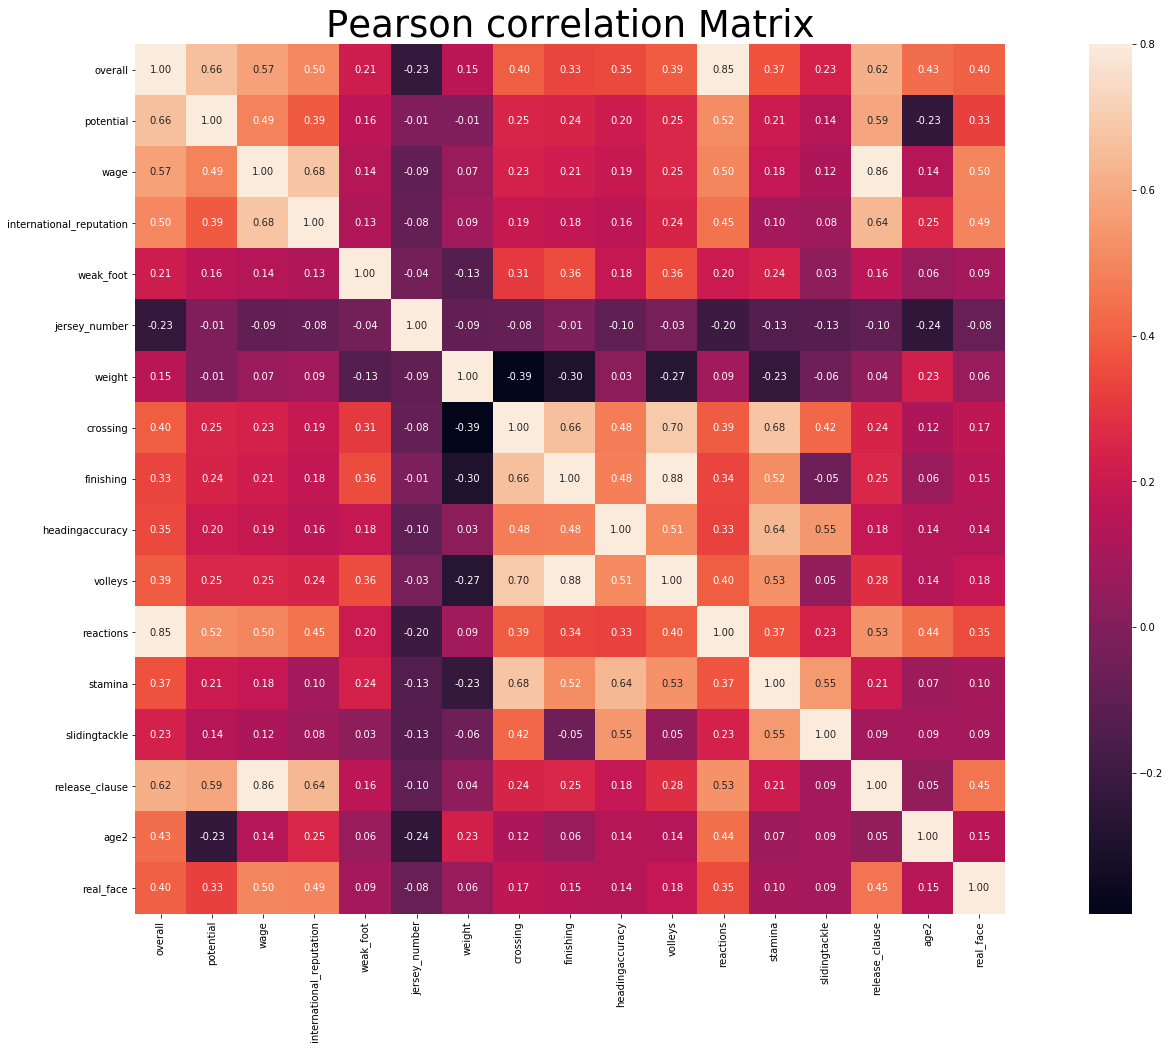

In [69]:
# Compute the correlation matrix
corr = ir_df[independent_variables].corr()

# Plot the correlation matrix
plt.figure(figsize=(30,16))
sns.heatmap(corr, vmax=.8, square=True, annot=True, fmt = '.2f')
plt.title('Pearson correlation Matrix', fontsize=37); plt.show()


## 4. Principal Component Analysis (PCA)
> "Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. In order to maximize variance, the first weight vector $w_{(1)}$ thus has to satisfy: 
${\displaystyle \mathbf {w} _{(1)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\{\Vert \mathbf {Xw} \Vert ^{2}\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\mathbf {w} ^{T}\mathbf {X^{T}} \mathbf {Xw} \right\}}$ " [Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)   

- Let's consider X ($X_1, X_2, X_3, …  X_p$), our matrix of independents variables of dimension n*p, mean $\mu$ and variance/covariance $\Sigma$. The Principal component $Z_1$ is the linear combination of the variables $X_1, X_2, X_3, …  X_p$.  
    - $Z_i = w_{i,1}X_1+ w_{i,2}X_2+ w_{i,3}X_3+ …   w_{i,p}X_p$
    - $ Z_i = w_{i}^{T}X$
    - $\Sigma^{2}(z)_{i} = W_{i}^{T}\Sigma W_{i}$
    - by maximizing the variance and using the Lagrange Multiplicator, we get $\Sigma W_{i} = \lambda_{i}W_{i}$
    
The variance of a main component is equal to the eigenvalue of the variance/covariance matrix $\Sigma$

### Methodology  

**`Note`**: PCA is sensitive to the relative scaling of the original data. Therefore, we will use data that we have already standardized. To analyze the [PC](https://www.ephiquant.com/reduction-de-dimension-analyse-en-composant-principal-avec-python/#Critere_de_retention_d8217un_composant_principal), we will follow the following steps.
1. Compute the covariance matrix (n*n matrix)
2. Determining eigenvalues and eigenvectors
3. Sort the eigenvalues and eigenvectors
4. Select the Principal Components
5. Reduce the dimension and plot the graph

### 4.1. Compute the covariance matrix

In [70]:
ir_df = pd.concat([scaled_df.drop('value', axis=1), df[dum_name]], axis=1)

cov_matrix = ir_df.cov()
cov_matrix.head()

age   overall  potential      wage   special  \
age        1.000000  0.464977  -0.236762  0.148525  0.246140   
overall    0.464977  1.000000   0.663346  0.573896  0.610294   
potential -0.236762  0.663346   1.000000  0.490633  0.386819   
wage       0.148525  0.573896   0.490633  1.000000  0.348278   
special    0.246140  0.610294   0.386819  0.348278  1.000000   

           international_reputation  weak_foot  skill_moves  jersey_number  \
age                        0.250947   0.065577     0.036189      -0.255510   
overall                    0.503630   0.210808     0.415560      -0.228483   
potential                  0.386085   0.157624     0.352585      -0.008343   
wage                       0.677923   0.138816     0.259534      -0.093208   
special                    0.293690   0.342839     0.765503      -0.142334   

             height  ...  gkreflexes  release_clause  contract_duration  \
age        0.055587  ...    0.101470        0.060760           0.102621   
overall    0.040610  ...   -0.024903        0.616422           0.258920   
potential  0.013024  ...   -0.052621        0.586751           0.211644   
wage       0.023457  ...   -0.024529        0.855922           0.224527   
special   -0.295782  ...   -0.674614        0.369321           0.111815   

               age2  position_df  position_gk  position_ml  position_sf  \
age        0.994582     0.023337     0.021061    -0.027230    -0.017169   
overall    0.434384     0.009739    -0.027688     0.015552     0.002397   
potential -0.231367    -0.013512    -0.027935     0.027799     0.013647   
wage       0.136649    -0.006224    -0.014826     0.006015     0.015035   
special    0.220648     0.019095    -0.228413     0.182840     0.026478   

           preferred_foot  real_face  
age             -0.000393   0.043979  
overall         -0.018933   0.115884  
potential       -0.015441   0.094388  
wage            -0.006505   0.143196  
special         -0.053669   0.071030  

[5 rows x 54 columns]

### 4.2. Campute the eigenvalues and eigenvectors

In [71]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
eigen_values

array([ 2.16193939e+01,  5.59062851e+00,  5.03764716e+00,  2.46692431e+00,
        1.98614404e+00,  1.39094002e+00,  1.07587251e+00,  9.04048335e-01,
        8.80179941e-01,  8.42050152e-01,  6.98187063e-01,  6.12646278e-01,
        5.33568953e-01,  4.07768037e-01,  3.74634532e-01,  3.35951661e-01,
        2.74482775e-01,  2.66622818e-01,  2.43922963e-01,  2.39875391e-01,
        2.30797343e-01,  2.18877801e-01,  2.09651480e-01,  1.98922888e-01,
        1.90304512e-01,  1.76580415e-01,  1.64993964e-01,  1.52112091e-01,
        1.45715985e-01,  1.36329414e-01,  1.28575202e-01,  1.22947965e-01,
        1.12883704e-01,  1.11087106e-01,  1.03355060e-01,  1.67711198e-03,
        2.82249559e-03,  3.44141371e-05,  8.66221529e-02,  8.13588294e-02,
        2.26182608e-02,  2.61075364e-02,  3.04110246e-02,  2.99506022e-02,
        3.60341052e-02,  3.71142783e-02,  4.72335023e-02,  5.47555893e-02,
        5.83315492e-02,  6.05309575e-02,  7.17722590e-02,  6.55114008e-02,
        6.69719220e-02, -

### 4.3. Ordored the eigenvalues and eigenvectors

In [72]:
order_index = eigen_values.argsort()[::-1] # Returns the indices that would sort this array.
order_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 38, 39, 50, 52, 51, 49, 48, 47, 46, 45, 44, 42, 43, 41, 40, 36,
       35, 37, 53])

In [73]:
eigen_values = eigen_values[order_index]
eigen_vectors = eigen_vectors[:,order_index]

### 4.4. Choise the optimals Principal component

In [74]:
index = ["PC_" + str(i+1) for i in range(len(eigen_values))]
columns = ["std","prop_variance(%)","cum_prop(%)"]

pc_proportion = pd.DataFrame([[np.round(i*0.5,2),
                               np.round(i*100/sum(eigen_values),2),
                               np.round(j*100/sum(eigen_values),2)] for i,j in zip(eigen_values,np.cumsum(eigen_values))],
                             columns=columns, index=index)
pc_proportion.head(10)

std  prop_variance(%)  cum_prop(%)
PC_1   10.81             44.15        44.15
PC_2    2.80             11.42        55.57
PC_3    2.52             10.29        65.86
PC_4    1.23              5.04        70.90
PC_5    0.99              4.06        74.95
PC_6    0.70              2.84        77.79
PC_7    0.54              2.20        79.99
PC_8    0.45              1.85        81.84
PC_9    0.44              1.80        83.64
PC_10   0.42              1.72        85.36

- From this table, we can observe that only the first PC alone explains nearly 44.15% of the variance. Similarly, the column of these cumulative proportions of the variance shows that the first three CPs capture more than 65% of the variance of the explanatory variables. The 90% of the variance are captured by the first 14 PCs. 
- So, the question is, how to choose the optimal PCs? Which one is better? 
- One possibility or method is to plot the cumulative proportion of the variance curve. Thus, the inflection point (where we observe the break of the curve) of the curve will determine the number of PCs.

<Figure size 432x288 with 0 Axes>

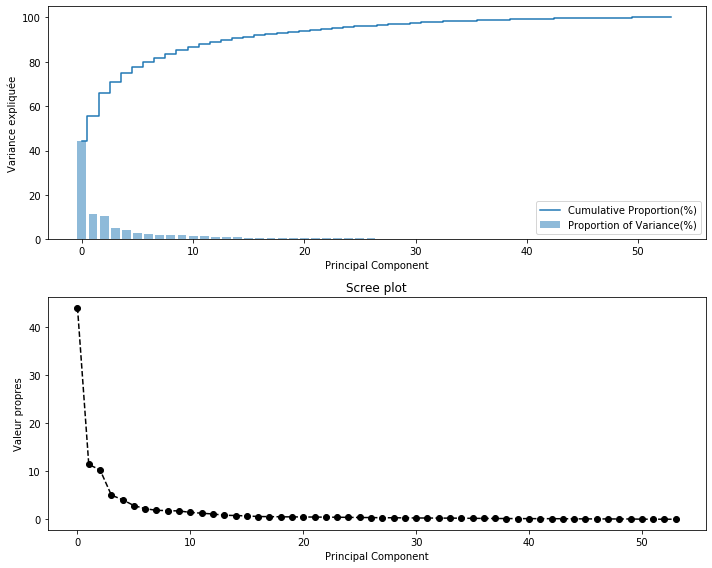

In [75]:
plt.clf()
plt.figure(figsize=(10,8))
plt.subplot(211)

plt.bar(range(len(eigen_values)), pc_proportion.iloc[:,1], alpha=0.5, align='center', label="Proportion of Variance(%)")
plt.step(range(len(eigen_values)), pc_proportion.iloc[:,2], where='mid', label="Cumulative Proportion(%)")

plt.ylabel("Variance expliquée"); plt.xlabel("Principal Component"); plt.legend(loc='best')

plt.subplot(212)
plt.plot(range(len(eigen_values)), pc_proportion.iloc[:,1], linestyle='--', marker='o', color='black')
plt.ylabel("Valeur propres"); plt.xlabel("Principal Component")
plt.title("Scree plot"); plt.tight_layout(); plt.show()

- The graphs show that the first four principal components can be considered as the optimal one. But why not the first five one? Let's check by using a simple linear regression function

In [76]:
pc_selection = pd.DataFrame(eigen_vectors,columns = index, index = ir_df.columns)
w = pc_selection.iloc[:, 0:5]

pca = ir_df.dot(w)
pca.columns = ['pca_1','pca_2','pca_3','pca_4','pca_5']
pca['name'] = df0.name

pca.head()

pca_1     pca_2      pca_3      pca_4     pca_5               name
0  13.331333  8.421257  19.106454  14.062063 -6.898290           L. Messi
1  11.992831  7.513253  14.660153   7.214692 -6.869234  Cristiano Ronaldo
2  11.986943  5.085929  15.522653  11.406000 -5.928614          Neymar Jr
3  -5.665519  8.772239  14.122697  10.528938 -2.315314             De Gea
4  12.464145  7.582171  13.125446  10.828646 -4.637408       K. De Bruyne

In [77]:
# Split the data between train and test sample
PCA_train, PCA_test, value_train, value_test = train_test_split(pca, scaled_df.value,
                                                                test_size=0.2, random_state=0)


In [78]:
# Comparison by the OLS metric
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

modelCP4 = sm.OLS(value_train, PCA_train[['pca_1','pca_2', 'pca_3','pca_4']]).fit(cov_type='HC3')
modelCP5 = sm.OLS(value_train, PCA_train[['pca_1','pca_2', 'pca_3','pca_4','pca_5']]).fit(cov_type='HC3')


y_CP4_pred = modelCP4.predict(PCA_test[['pca_1','pca_2', 'pca_3','pca_4']])
y_CP5_pred = modelCP5.predict(PCA_test[['pca_1','pca_2', 'pca_3','pca_4','pca_5']])

print("modelCP4 MAE: ", mean_absolute_error(y_test, y_CP4_pred))
print("modelCP4 MSE:", mean_squared_error(y_test, y_CP4_pred))
print("modelCP4 R^2:", r2_score(y_test, y_CP4_pred))
print()
print("modelCP5 MAE: ", mean_absolute_error(value_test, y_CP5_pred))
print("modelCP5 MSE:", mean_squared_error(value_test, y_CP5_pred))
print("modelCP5 R^2:", r2_score(value_test, y_CP5_pred))


modelCP4 MAE:  0.34579542392764323
modelCP4 MSE: 0.2621932602074597
modelCP4 R^2: 0.7161666913430662

modelCP5 MAE:  0.31349338544588207
modelCP5 MSE: 0.21356897316547638
modelCP5 R^2: 0.7688041705112586


- The regression show that the model 2 with five is better to the first one: lower MAE and MSE and higher $R^2$
- So, let's try visualize the first two and tree PCAs in a graph of the variables in order to see the more correlated one. 

### 4.5. Visulize the CPA

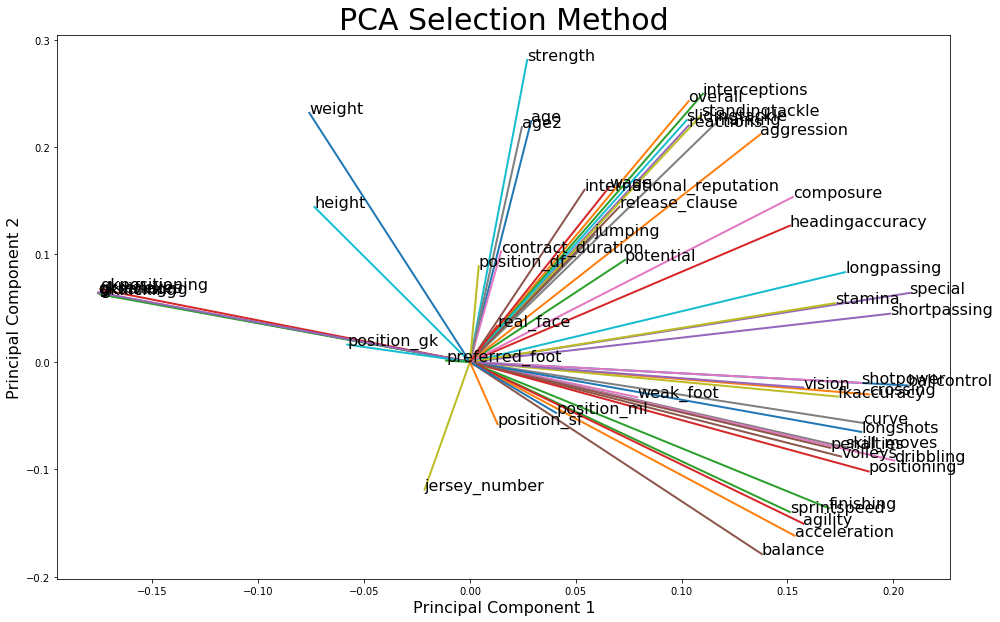

In [79]:
fig= plt.figure(figsize=(16,10))

#ax.plot([0], [0], [0], 'o', markersize=19, color='red')

for vec, var_name in zip(eigen_vectors, ir_df.columns.values):
    plt.plot([0, vec[0]], [0, vec[1]], lw=2)
    plt.text(vec[0], vec[1], var_name, size = 7, color='k', fontsize=16)
    
plt.title('PCA Selection Method', loc='center', fontsize= 30)
plt.xlabel('Principal Component 1', fontsize= 16)
plt.ylabel('Principal Component 2', fontsize= 16)
plt.show()

- We can see in this curve that the variables “standinstackle” and “slidinstackle” go together in term of correlation. In the other side, we can also see that the variables “longpassing”, and “stamina”, and the variables  “shorthparsing” and “special” are very close… They are correlated with each other.

- Let's take a look at also with the first tree PCs

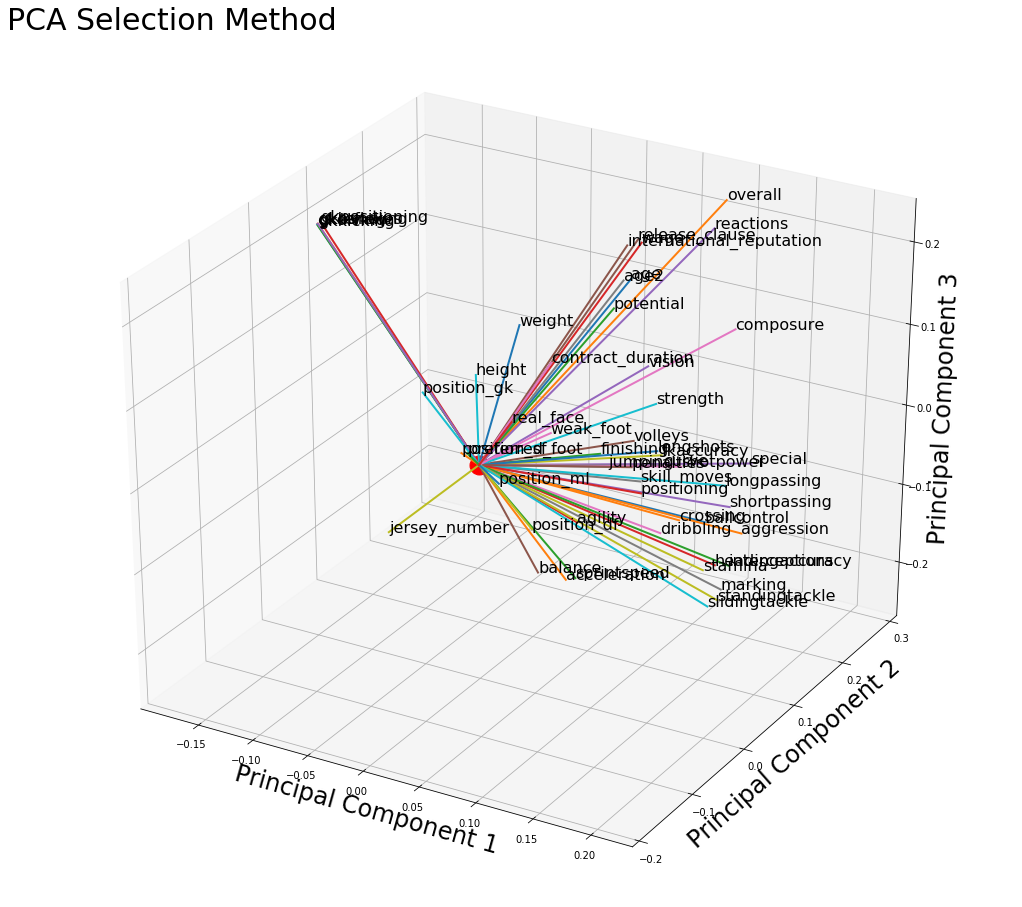

In [81]:
from mpl_toolkits.mplot3d import Axes3D

plt.close()
fig= plt.figure(figsize=(14,12))
ax = Axes3D(fig)

ax.plot([0], [0], [0], 'o', markersize=19, color='red')

for vec, var_name in zip(eigen_vectors, ir_df.columns.values):
    ax.plot([0, vec[0]], [0, vec[1]], [0, vec[2]], lw=2)
    ax.text(vec[0], vec[1], vec[2], var_name, size = 7, color='k', fontsize=16)
    
plt.title('PCA Selection Method', loc='left', fontsize= 30)
ax.set_xlabel('Principal Component 1', fontsize= 24)
ax.set_ylabel('Principal Component 2', fontsize= 24)
ax.set_zlabel('Principal Component 3', fontsize= 24)
plt.show()

### 4.6. PCA using only the 18 regressors selected by Lasso and VIF

<Figure size 432x288 with 0 Axes>

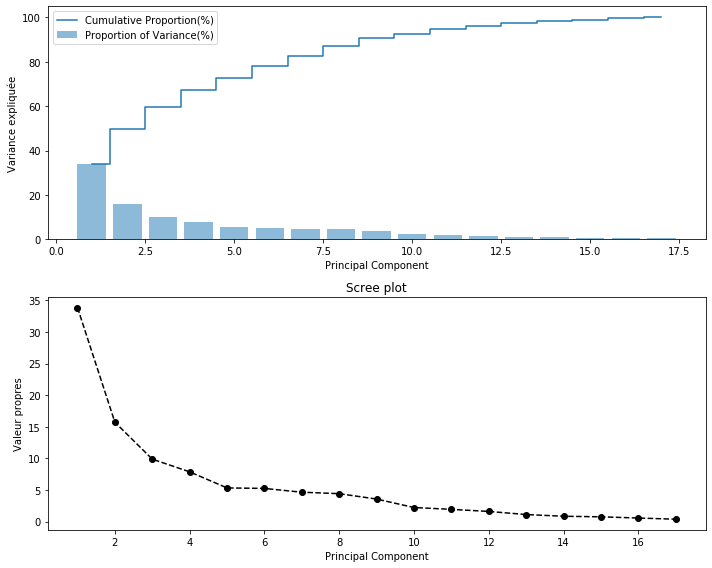

In [82]:
X_scaled = normalize(df0[independent_variables])
cov_matrix = X_scaled.cov()

eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

order_index = eigen_values.argsort()[::-1]
eigen_values = eigen_values[order_index]
eigen_vectors = eigen_vectors[:,order_index]

index = ["PC_" + str(i+1) for i in range(len(eigen_values))]
columns = ["std","prop_variance(%)","cum_prop(%)"]

pc_proportion = pd.DataFrame([[np.round(i*0.5,2),
                               np.round(i*100/sum(eigen_values),2),
                               np.round(j*100/sum(eigen_values),2)] for i,j in zip(eigen_values,np.cumsum(eigen_values))],
                             columns=columns, index=index)

plt.clf()
plt.figure(figsize=(10,8))
plt.subplot(211)

plt.bar(range(1,1+len(eigen_values)), pc_proportion.iloc[:,1], alpha=0.5, align='center', label="Proportion of Variance(%)")
plt.step(range(1,1+len(eigen_values)), pc_proportion.iloc[:,2], where='mid', label="Cumulative Proportion(%)")

plt.ylabel("Variance expliquée"); plt.xlabel("Principal Component"); plt.legend(loc='best')

plt.subplot(212)
plt.plot(range(1,len(eigen_values)+1), pc_proportion.iloc[:,1], linestyle='--', marker='o', color='black')
plt.ylabel("Valeur propres"); plt.xlabel("Principal Component")
plt.title("Scree plot"); plt.tight_layout(); plt.show()

In this case the graph show clearly that the number of `optimal PCA` is `'3'`.

In [83]:
pc_selection = pd.DataFrame(eigen_vectors, columns = index, index = X_scaled.columns.tolist())
w = pc_selection.iloc[:, 0:3]

pca = X_scaled.dot(w)
pca.columns = ['pca_1','pca_2','pca_3']
pca['name'] = df0.name


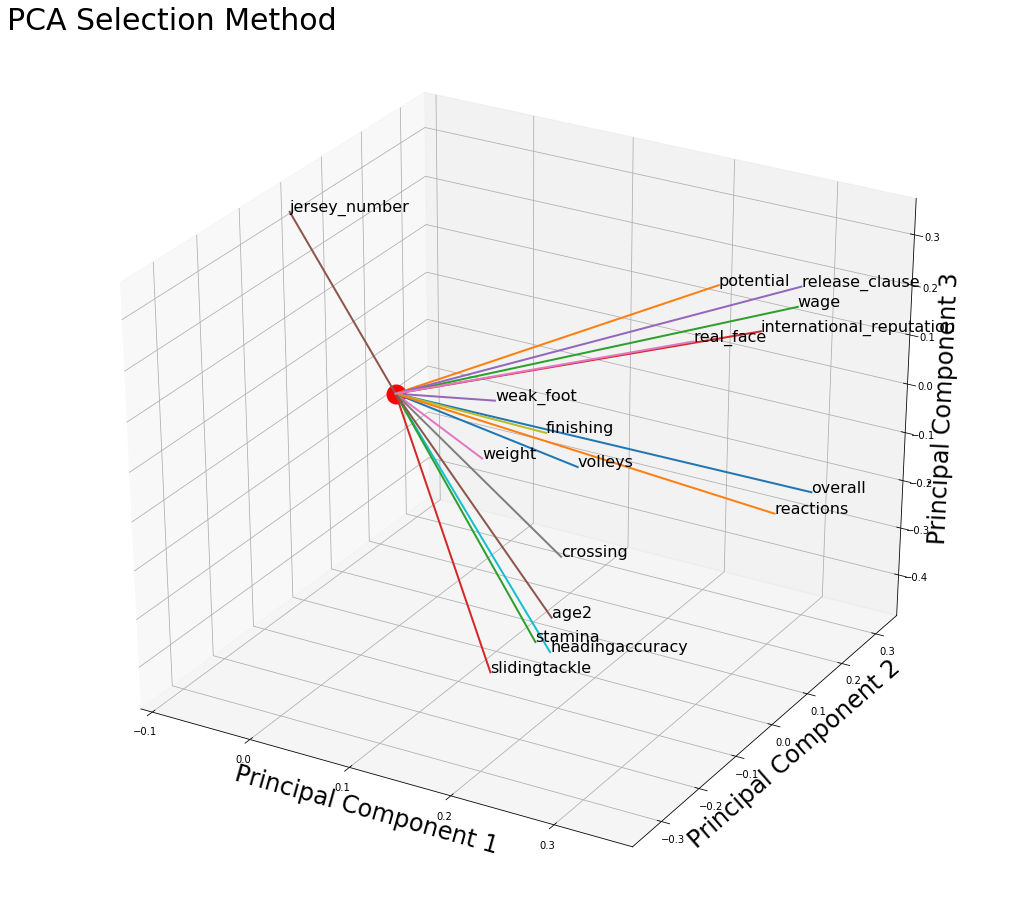

In [84]:
from mpl_toolkits.mplot3d import Axes3D

plt.close()
fig= plt.figure(figsize=(14,12))
ax = Axes3D(fig)

ax.plot([0], [0], [0], 'o', markersize=19, color='red')

for vec, var_name in zip(eigen_vectors, X_scaled.columns.tolist()):
    ax.plot([0, vec[0]], [0, vec[1]], [0, vec[2]], lw=2)
    ax.text(vec[0], vec[1], vec[2], var_name, size = 7, color='k', fontsize=16)
    
plt.title('PCA Selection Method', loc='left', fontsize= 30)
ax.set_xlabel('Principal Component 1', fontsize= 24)
ax.set_ylabel('Principal Component 2', fontsize= 24)
ax.set_zlabel('Principal Component 3', fontsize= 24)
plt.show()

### 4.7. PCA using `Scikir-Learn` function with only the 18 selected regressors

In [85]:
from sklearn.decomposition import PCA

X_scaled = normalize(df0[independent_variables])

cpa = PCA(n_components=3)
Z = pd.DataFrame(cpa.fit_transform(X_scaled), columns=['pca1','pca2','pca3'])
Z['name'] = df0.name


In [86]:
"""colour =('orange', 'white', 'black','violet','green','yellow')
name = tuple(df0.name)
plt.close()
fig= plt.figure(figsize=(12,12))
ax = Axes3D(fig)
Z = Z.iloc[:100,:]
for i, j in zip(name, colour):
    ax.scatter(Z.pca1,Z.pca2,Z.pca3, label=i, c=j, s=30, )
        
ax.plot([0], [0], [0], 'o', markersize=12, color='red')

for vec, lab in zip(eigen_vectors, X_scaled.columns.tolist()):
    ax.plot([0, vec[0]], [0, vec[1]], [0, vec[2]], color='k', lw=2)
    ax.text(vec[0], vec[1], vec[2], lab, size = 7, color='k', fontsize=16)

for n, t in zip(Z.index, Z.name):
    ax.text(Z.iloc[n, 0], Z.iloc[n, 2], Z.iloc[n, 3], t, size = 5, color = 'darkblue')

ax.set_xlabel('Composant Principal 1')
ax.set_ylabel('Composant Principal 2')
ax.set_zlabel('Composant Principal 3')
plt.show()"""

"colour =('orange', 'white', 'black','violet','green','yellow')\nname = tuple(df0.name)\nplt.close()\nfig= plt.figure(figsize=(12,12))\nax = Axes3D(fig)\nZ = Z.iloc[:100,:]\nfor i, j in zip(name, colour):\n    ax.scatter(Z.pca1,Z.pca2,Z.pca3, label=i, c=j, s=30, )\n        \nax.plot([0], [0], [0], 'o', markersize=12, color='red')\n\nfor vec, lab in zip(eigen_vectors, X_scaled.columns.tolist()):\n    ax.plot([0, vec[0]], [0, vec[1]], [0, vec[2]], color='k', lw=2)\n    ax.text(vec[0], vec[1], vec[2], lab, size = 7, color='k', fontsize=16)\n\nfor n, t in zip(Z.index, Z.name):\n    ax.text(Z.iloc[n, 0], Z.iloc[n, 2], Z.iloc[n, 3], t, size = 5, color = 'darkblue')\n\nax.set_xlabel('Composant Principal 1')\nax.set_ylabel('Composant Principal 2')\nax.set_zlabel('Composant Principal 3')\nplt.show()"

### Save the Final data in `csv` file named `ir_fifa`

In [87]:
# Ignore the variables that are not select by Lasso and VIF
ir_fifa = df0[['name','age','value']+independent_variables].copy()

# Exportation the data
ir_fifa.to_csv('ir_fifa.csv', decimal='.', sep=',', index=False)

# III. Linear Regression 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d.axes3d import Axes3D
import timeit 

from scipy.optimize import minimize 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm


In [2]:
# Import the data
ir_fifa = pd.read_csv('ir_fifa.csv', decimal='.', sep=',')
ir_fifa.head()

name  age        value  overall  potential      wage  \
0           L. Messi   31  110500000.0       94         94  565000.0   
1  Cristiano Ronaldo   33   77000000.0       94         94  405000.0   
2          Neymar Jr   26  118500000.0       92         93  290000.0   
3             De Gea   27   72000000.0       91         93  260000.0   
4       K. De Bruyne   27  102000000.0       91         92  355000.0   

   international_reputation  weak_foot  jersey_number  weight  crossing  \
0                       5.0        4.0           10.0   159.0      84.0   
1                       5.0        4.0            7.0   183.0      84.0   
2                       5.0        5.0           10.0   150.0      79.0   
3                       4.0        3.0            1.0   168.0      17.0   
4                       4.0        5.0            7.0   154.0      93.0   

   finishing  headingaccuracy  volleys  reactions  stamina  slidingtackle  \
0       95.0             70.0     86.0       95.0     72.0           26.0   
1       94.0             89.0     87.0       96.0     88.0           23.0   
2       87.0             62.0     84.0       94.0     81.0           33.0   
3       13.0             21.0     13.0       90.0     43.0           13.0   
4       82.0             55.0     82.0       91.0     90.0           51.0   

   release_clause  age2  real_face  
0     226500000.0   961          1  
1     127100000.0  1089          1  
2     228100000.0   676          1  
3     138600000.0   729          1  
4     196400000.0   729          1

In [3]:
def normalize(x):
    """
    Standardize features by removing the mean and scaling to unit variance
    We get the same result when we use the Sklern function: StandardScaler()
    """
    scaled_x = (x-x.mean(axis=0))/x.std(axis=0)
    return scaled_x


In [4]:
X_scaled = normalize(ir_fifa.drop('name', axis=1))
X = X_scaled.drop(['value'], axis=1)
y = X_scaled.value

X_train, X_test, y_train, y_test = train_test_split(X_scaled.drop(['value'], axis=1),
                                                    X_scaled.value,
                                                    test_size=0.2, random_state=0)


In [5]:
print('Our train and test samples have respectively {} and {} observations'.format(
    X_train.shape[0],X_test.shape[0]))

Our train and test samples have respectively 13314 and 3329 observations


### 1. Cost function

In [10]:
# Prediction function: h(x)
def predict(theta, x):
    return x@theta

# The error function
def error(theta, x, y):
    return predict(theta,x)-y

def cost_function(theta, x, y):
    """
    compute the cost function for a given theta
    - return the value of the loss function
    - theta is a vector of parameter values
    """
    J = 0 
    m = x.shape[0]
    for i in range(m):
        J += error(theta, x[i], y[i])**2
    J /= 2
    return(J)


In [58]:
m, n = X_train.shape
theta = np.random.multivariate_normal(np.zeros((n)), np.eye((n))).reshape((n,1))

In [59]:
start_timer = timeit.default_timer()
print('cost:', cost_function(theta, np.array(X_train), np.array(y_train)))
print('time: {:.5f}'.format(timeit.default_timer() - start_timer))

cost: [91919.09845033]
time: 0.10159


In [60]:
# the same function, using matrix multiplication
def cost_function_vec(theta, x, y):
    err = error(theta, x, y) 
    J = (err.transpose() @ err)
    J /= 2
    return J.flatten()

cost_function_vec(theta, np.array(X_train), np.array(y_train))

array([127861.2648275 , 113235.29135903, 113418.68914547, ...,
       115842.70849037, 115377.60895786, 121531.2335418 ])

### 2. Gradient computing

In [61]:
def gradient(theta, x, y):
    n = theta.shape[0]
    G = np.zeros(n)
    for j in range(n):
        for i in range(m):
            err = error(theta, x[i,], y[i])
            G[j] += err*x[i,j]
    return(G)


In [62]:
start_timer = timeit.default_timer()
print('gradient descent:\n', gradient(theta, np.array(X_train), np.array(y_train)))
print('time: {:.5f}'.format(timeit.default_timer() - start_timer))

gradient descent:
 [-19333.05330236  25228.0845365   25525.96522028  21316.41215031
   3918.76858855  11667.93013624  -8082.44116363  -3404.65983356
  -2700.87244021  -1964.65064462   1608.42981002  -5456.75945353
    551.12011286  -1704.31058203   -809.05326712     72.11489238
  -9502.09579146   3373.30236415  19089.72997931 -19299.89526021
  24832.82106731]
time: 1.82775


In [30]:
def gradient_vec(theta, x, y):
    return(x.transpose() @x@theta - x.transpose()@y)

# gradient_vec(theta, np.array(X_train), np.array(y_train))

### 3. Stochastic gradient descent

In [41]:
def stochastic_gradient_descent(x, y, alpha=0.0001, maxiter = 100000, tol = 1e-6):
    
    m = x.shape[0]
    n = len(x[0])
    # initialize a vector theta distributed as a multivariate normal with mu=0 and sigma=identity matrix
    theta = np.random.multivariate_normal(np.zeros((n)), np.eye((n))).reshape((n,1))
    #theta = OLSmodel.params.values.reshape(n,1)
    it = 0
    
    fun_value = cost_function(theta, x, y)
    print("Stochastic gradient descent...")
    start_time = timeit.default_timer()
    while it < maxiter:
        for i in range(m):
            old = fun_value 
            theta = theta - (alpha*error(theta, x[i] , y[i])*x[i]).reshape(n,1)
            fun_value = cost_function(theta, x, y) 
            diff = np.abs(old-fun_value)
        it += 1
        if np.abs(diff) < tol:
                break
        print("------------------------------------------")
        print("batch:{} cost:{} diff:{}".format(it,fun_value, diff))
    
    print('Timer: {:.5f}'.format(timeit.default_timer() - start_time))
    print("==========================")
    print("Finished in {} iterations:".format(it))
    print("Cost: {}".format(fun_value))
    print("RMSE: {}".format(np.mean(error(theta,x,y)**2)))
    print("==========================")
    return(theta)


This method take a lot of time with our large samples. So, we just take some observations in order to test the algorithm.
We will the use the `Scipy` function on the full data.

In [45]:
l, _, p, _ = train_test_split(np.array(X_test),np.array(y_test), test_size=0.6, random_state=0)

results = stochastic_gradient_descent(l,p, alpha = 0.001, maxiter = 100, tol = 0.001)

Stochastic gradient descent...
------------------------------------------
batch:1 cost:[1103.75390864] diff:[0.20244288]
------------------------------------------
batch:2 cost:[552.37247883] diff:[0.14097934]
------------------------------------------
batch:3 cost:[345.42033384] diff:[0.28408736]
------------------------------------------
batch:4 cost:[232.7942313] diff:[0.26259766]
------------------------------------------
batch:5 cost:[162.60475938] diff:[0.21054635]
------------------------------------------
batch:6 cost:[116.36180788] diff:[0.16141387]
------------------------------------------
batch:7 cost:[85.05939701] diff:[0.12194627]
------------------------------------------
batch:8 cost:[63.51207498] diff:[0.09185538]
------------------------------------------
batch:9 cost:[48.48875617] diff:[0.06932399]
------------------------------------------
batch:10 cost:[37.89810946] diff:[0.05253073]
Timer: 103.16879
Finished in 10 iterations:
Cost: [37.89810946]
RMSE: 1.5530010046

In [46]:
results

array([[ 2.53233792e-03],
       [ 1.62304355e-02],
       [ 2.26972345e-01],
       [ 3.87042433e-02],
       [ 7.61378640e-03],
       [-8.60277905e-04],
       [-2.58513033e-02],
       [-1.36980761e-01],
       [-1.20872518e-01],
       [-8.94547139e-02],
       [ 2.88842271e-01],
       [ 8.10483162e-02],
       [-2.51966509e-02],
       [ 8.77679136e-02],
       [ 6.18262760e-01],
       [-1.01088015e+00],
       [-8.12841631e-04],
       [ 9.46425087e-01]])

### 4. Scipy minimze function
- Method 1

In [49]:
from scipy.optimize import minimize
# Method 1
results1 = minimize(cost_function,
                    x0=theta.flatten(), 
                    args=(np.array(X_train), np.array(y_train)),
                    method='nelder-mead',
                    options={'disp': True})

In [50]:
results1.x

array([ 0.15084136, -0.38850853, -0.31431334, -0.18388082,  0.03726404,
       -0.0922043 ,  0.29895317, -0.0782945 ,  0.0436885 , -0.17340189,
       -0.11414587,  0.13402561,  0.59767005, -0.15714307,  1.55172713,
        2.71458705,  0.06569647, -2.95567537])

- Method 2

In [51]:
results2 = minimize(cost_function,
                    x0=theta,
                    jac=gradient,
                    args=(np.array(X_train), np.array(y_train)),
                    method = 'BFGS',
                    options={'gtol': 1e-3, 'disp': True})

Optimization terminated successfully.
         Current function value: 66.171012
         Iterations: 23
         Function evaluations: 34
         Gradient evaluations: 34


In [52]:
results2.x

array([ 2.19380268e-02, -1.17966400e-02,  1.98569384e-02,  2.94690955e-02,
        3.67791014e-03, -1.97481772e-03,  1.29471619e-04, -7.19078308e-03,
       -5.94937689e-03, -9.93744596e-04,  6.82698719e-03,  3.88381126e-03,
        9.53794336e-03, -7.16836014e-03,  9.63270428e-01, -7.03341000e-02,
       -1.24196342e-02,  6.22904615e-02])

### 5. Using OLS regression from statsmodels 

In [11]:
# Fit an OLS model
OLSmodel = sm.OLS(y_train, X_train).fit()

y_ols_pred = OLSmodel.predict(X_test)

print("OLS MAE: ", mean_absolute_error(y_test, y_ols_pred))
print("OLS MSE:", mean_squared_error(y_test, y_ols_pred))
print("OLS R^2:", r2_score(y_test, y_ols_pred))


OLS MAE:  0.0448497052851069
OLS MSE: 0.010238605187233529
OLS R^2: 0.9889163543562289


In [12]:
# Let's check if we have Heteroscedasticity in our model
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

bp_test = het_breuschpagan(OLSmodel.resid, OLSmodel.model.exog)
#white_test = het_white(ols_model.resid, ols_model.model.exog)

labels = ["LM Statistic:", "LM-Test P-value:", "F-Statistic:", "F-Test P-value:"]

print(pd.Series(bp_test, index = labels))
#print(pd.Series(white_test, index = labels))

LM Statistic:       4110.440759
LM-Test P-value:       0.000000
F-Statistic:         329.899064
F-Test P-value:        0.000000
dtype: float64


In [15]:
# Corret Heteroscedasticity using  HCCM method
OLSmodel = sm.OLS(y_train, X_train).fit(cov_type='HC3')

# Visualize the summary
print(OLSmodel.summary())

y_ols_pred = OLSmodel.predict(X_test)

print("OLS MAE: ", mean_absolute_error(y_test, y_ols_pred))
print("OLS MSE:", mean_squared_error(y_test, y_ols_pred))
print("OLS R^2:", r2_score(y_test, y_ols_pred))


                                 OLS Regression Results                                
Dep. Variable:                  value   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              9983.
Date:                Wed, 22 Jan 2020   Prob (F-statistic):                        0.00
Time:                        15:50:53   Log-Likelihood:                          11890.
No. Observations:               13314   AIC:                                 -2.374e+04
Df Residuals:                   13296   BIC:                                 -2.361e+04
Df Model:                          18                                                  
Covariance Type:                  HC3                                                  
                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------------

### 6. Linear polynomiale Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import sklearn.linear_model as lm

lr = lm.LinearRegression()
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), lr)

poly_model.fit(X_train, y_train)
y_poly_pred = poly_model.predict(X_train)

print("MAE using built-in function:", mean_absolute_error(y_test, poly_model.predict(X_test)))
print("MSE using built-in function:", mean_squared_error(y_test, poly_model.predict(X_test)))
print("R^2 using built-in function:", r2_score(y_test, poly_model.predict(X_test)))


MAE using built-in function: 0.03868292209566715
MSE using built-in function: 0.005229315439415975
R^2 using built-in function: 0.9943390844524157


# Nonlinear machine learning algorithms
- Tree-based methods
    - Regression Tree
    - Bagging
    - Random Forest
    - Boosting
- K-Nearest Neighbors (KNN)
- Support Vector Regression (SVR)


# IV. Tree-based Methods
- The Regression tree can take into acount the outliers values and the most importants variables and can be used without normalization
- But the trees can be not robuste and tend to over-fit depending the the depth of tree

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

# Libraries for Regresion Tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## 1. Variables Importances: Features Selection


In [16]:
# Build a forest and compute the feature importances
forest = ExtraTreesRegressor(n_estimators=250, random_state=0)

X = ir_fifa.drop(['name','value'], axis=1)
y = ir_fifa.value

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

important_variables = np.array(X.columns)[indices][:10]


In [17]:
importances_df = pd.DataFrame(importances[indices], index=np.array(X.columns)[indices])
importances_df.columns=['important_rate']
importances_df

important_rate
release_clause                  0.505880
overall                         0.228495
potential                       0.082813
wage                            0.077969
reactions                       0.047237
international_reputation        0.033839
real_face                       0.010876
age                             0.003294
age2                            0.002914
finishing                       0.001425
volleys                         0.001206
slidingtackle                   0.000953
jersey_number                   0.000607
weight                          0.000591
crossing                        0.000528
headingaccuracy                 0.000509
stamina                         0.000492
weak_foot                       0.000373

As you can see in the previous table, only the `release_clause` variable explaine more then 50% of the variability of the `value` of the players. That is because the release clause is considered as the minimun value to exchange the player on the market. One option to this problem is to delete this variable. Let's keep it.

## 2. Regression Trees
- First, we look for the `criterion` (`mse` or `friedman_mse`) and the `depth` of the tree
- Than, run the model on the training set, test the performance on the test sample
- Finaly, drow the tree graph

In [2]:
# Normalize the data
def normalize(x):
    """
    Standardize features by removing the mean and scaling to unit variance
    We get the same result when we use the Sklern function: StandardScaler()
    """
    scaled_x = (x-x.mean(axis=0))/x.std(axis=0)
    return scaled_x


In [3]:
# Read and split the data 
ir_fifa = pd.read_csv('ir_fifa.csv')
ir_fifa_scaled = normalize(ir_fifa.drop('name', axis=1))

X_train, X_test, y_train, y_test = train_test_split(ir_fifa_scaled.drop('value', axis=1),
                                                    ir_fifa_scaled.value,
                                                    test_size=0.2, random_state=0)

print('Our train and test samples have respectively {} and {} observations'.format(
    X_train.shape[0],X_test.shape[0]))

Our train and test samples have respectively 13314 and 3329 observations


### 2.1. Choose the best `criteria` and `depth`

In [6]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))

# List to store the average RMSE for each value of max_depth:
accuracy_mse = []
accuracy_friedman_mse = []
for depth in max_depth_range:
    
    reg_mse = DecisionTreeRegressor(criterion='mse', max_depth = depth, random_state=0)
    reg_mse.fit(X_train, y_train)
    score_mse = reg_mse.score(X_test, y_test)
    accuracy_mse.append(score_mse)

    reg_friedman_mse = DecisionTreeRegressor(criterion='friedman_mse', max_depth = depth, random_state=0)
    reg_friedman_mse.fit(X_train, y_train)
    score_friedman_mse = reg_friedman_mse.score(X_test, y_test)
    accuracy_friedman_mse.append(score_friedman_mse)


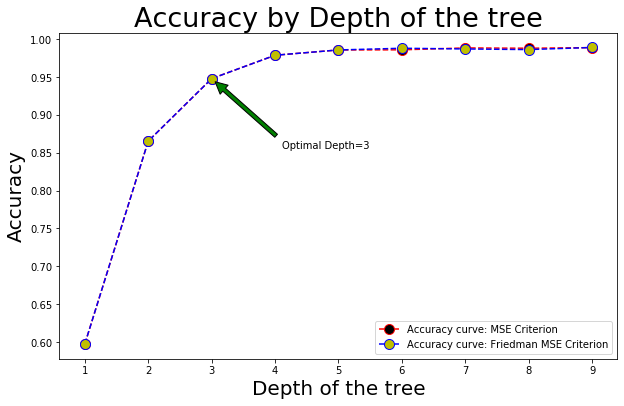

In [7]:
# Graph
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(max_depth_range, accuracy_mse, label='Accuracy curve: MSE Criterion', c='red', 
        linestyle='dashed', marker='o', markerfacecolor='k', markersize=10);

ax.plot(max_depth_range, accuracy_friedman_mse, label='Accuracy curve: Friedman MSE Criterion', c='blue', 
        linestyle='dashed', marker='o', markerfacecolor='y', markersize=10);

ax.annotate('Optimal Depth=3', xy=(3, np.max(accuracy_mse[2])), xytext=(70, -70), 
            arrowprops=dict(facecolor='g', shrink=0.05), clip_on=False, textcoords='offset points')

plt.title('Accuracy by Depth of the tree', fontsize=27)
ax.set_ylabel(ylabel='Accuracy', fontsize=20)
ax.set_xlabel(xlabel='Depth of the tree', fontsize=20)
ax.legend(); plt.show()


This above graph suggeste that both `criterion` (`mse`, `friedman_mse`) are same and the optimal depth is 3

### 2.2. Train and evaluate the model using the best criterion and optimal depth

In [12]:
# Fit the regression and make prediction with `friedman_mse`criteria and `max_depth=3`
regresion_tree = DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, random_state=42)
regresion_tree.fit(X_train,y_train)

y_pred = regresion_tree.predict(X_test)

print('DT MSE:', mean_squared_error(y_test, y_pred))
print('DT MAE:', mean_absolute_error(y_test, y_pred))
print('DT R^2:', r2_score(y_test, y_pred))

DT MSE: 0.09953005594301727
DT MAE: 0.13649988923654782
DT R^2: 0.8922552583282896


In [9]:
# Evaluate the model using 100-folds
kfold = KFold(n_splits=100, random_state=42)
kfold_tree = DecisionTreeRegressor(criterion='mse', max_depth=3, random_state=42)

res_kfold_train = cross_val_score(kfold_tree, X_train,y_train, cv=kfold)
res_kfold_test = cross_val_score(kfold_tree, X_test,y_test, cv=kfold)

print('KFolde Score in train sample', res_kfold_train.mean())
print('KFolde Score in test sample', res_kfold_test.mean())

KFolde Score in train sample 0.9496305744871241
KFolde Score in test sample 0.9362041736977907


### 2.3. Decision Tree Plot

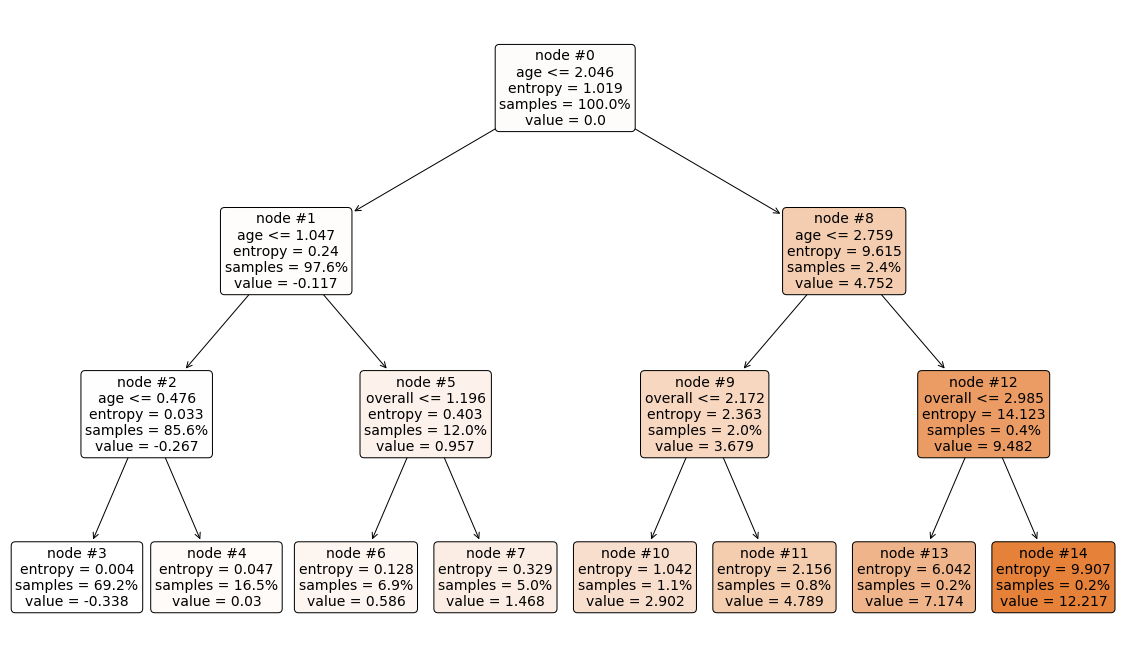

In [13]:
plt.figure(figsize=(20,12))
tree.plot_tree(regresion_tree, filled=True, feature_names=ir_fifa.drop(['value'], axis=1).columns.tolist(),
               node_ids=True, proportion=True, rounded=True)
plt.show()


### 2.4. Trying without max_depth

In [14]:
regresion_tree = DecisionTreeRegressor(criterion='friedman_mse', random_state=0)
regresion_tree.fit(X_train,y_train)

y_pred = regresion_tree.predict(X_test)

print('DT MSE:', mean_squared_error(y_test, y_pred))
print('DT MAE:', mean_absolute_error(y_test, y_pred))
print('DT R^2:', r2_score(y_test, y_pred))

DT MSE: 0.011392513061247708
DT MAE: 0.03062154758727352
DT R^2: 0.9876672090139437


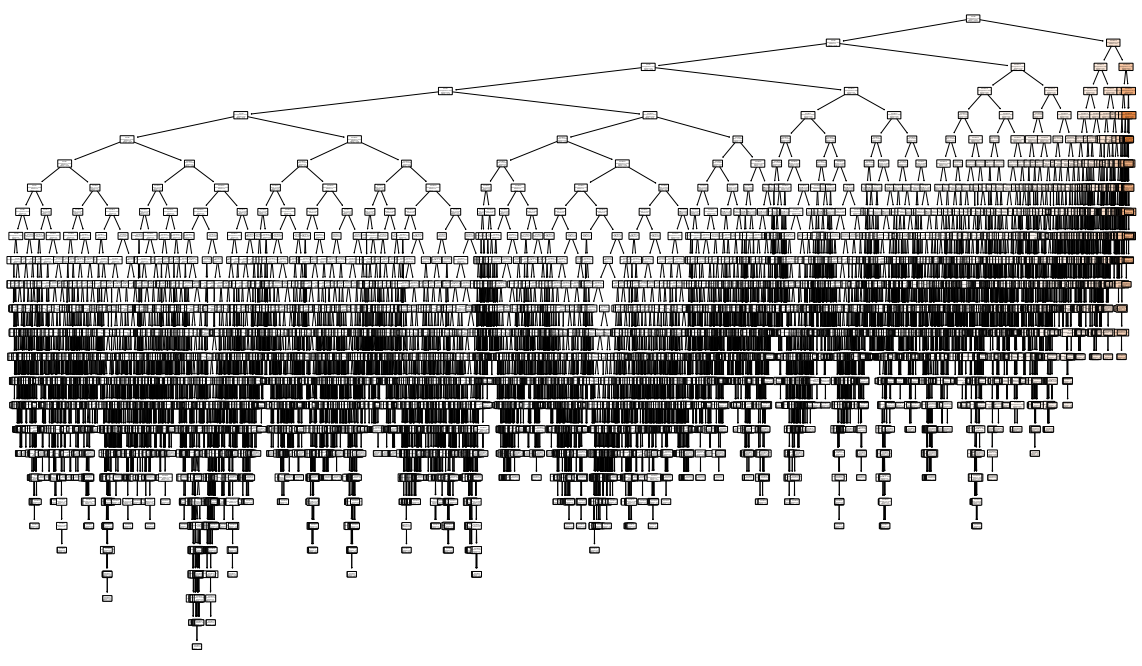

In [103]:
# Decision Tree Plot
#plt.figure(figsize=(20,12))
#tree.plot_tree(regresion_tree, filled=True, feature_names=ir_fifa.drop(['value'], axis=1).columns.tolist(),
#               node_ids=True, proportion=True, rounded=True)
#plt.show()


## 3. Random forests Regression

In [18]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))

score = []
for depth in max_depth_range:

    rand_forest = RandomForestRegressor(n_estimators=100, criterion='mse', max_features=int(round(np.sqrt(X_train.shape[1]))), max_depth=depth, random_state=42)
    rand_forest.fit(X_train, y_train)
    score.append(rand_forest.score(X_test, y_test))


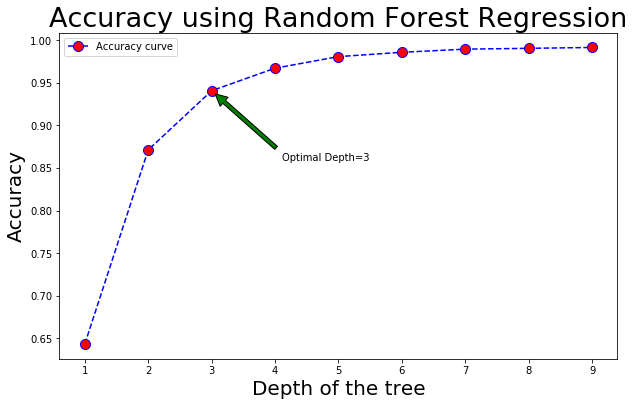

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(max_depth_range, score, label='Accuracy curve', c='blue', 
        linestyle='dashed', marker='o', markerfacecolor='red', markersize=10);

ax.annotate('Optimal Depth=3', xy=(3, np.max(score[2])), xytext=(70, -70), 
            arrowprops=dict(facecolor='g', shrink=0.05), clip_on=False, textcoords='offset points')

ax.set_title('Accuracy using Random Forest Regression', fontsize=27)
ax.set_ylabel(ylabel='Accuracy', fontsize=20)
ax.set_xlabel(xlabel='Depth of the tree', fontsize=20)
ax.legend(); plt.show()


In [20]:
# Fit the regression and make prediction with `friedman_mse`criteria and `max_depth=3`
rand_forest = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=3, max_features=int(round(np.sqrt(X_train.shape[1]))), random_state=42)
rand_forest.fit(X_train, y_train)

y_pred = rand_forest.predict(X_test)

print('RF MSE:', mean_squared_error(y_test, y_pred))
print('RF MAE:', mean_absolute_error(y_test, y_pred))
print('RF R^2:', r2_score(y_test, y_pred))

RF MSE: 0.054974390729564934
RF MAE: 0.13007671714399913
RF R^2: 0.9404883130869756


In [21]:
# Evaluate the model using 10-folds
kfold = KFold(n_splits=10, random_state=7)
kfold_rand = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=3, max_features=int(round(np.sqrt(X_train.shape[1]))), random_state=42)

res_kfold_train = cross_val_score(kfold_rand, X_train,y_train, cv=kfold)
res_kfold_test = cross_val_score(kfold_rand, X_test,y_test, cv=kfold)

print('KFolde RF Score in train sample', res_kfold_train.mean())
print('KFolde RF Score in test sample', res_kfold_test.mean())

KFolde RF Score in train sample 0.9348941932740867
KFolde RF Score in test sample 0.9293495808227691


> You are right that the two concepts are similar. As is implied by the names "Tree" and "Forest," a Random Forest is essentially a collection of Decision Trees. A decision tree is built on an entire dataset, using all the features/variables of interest, whereas a random forest randomly selects observations/rows and specific features/variables to build multiple decision trees from and then averages the results. After a large number of trees are built using this method, each tree "votes" or chooses the class, and the class receiving the most votes by a simple majority is the "winner" or predicted class. There are of course some more detailed differences, but this is the main conceptual difference.

## 4. Gradient Boosting for regression
> GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function. Source: [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

In [22]:
boosting_reg = GradientBoostingRegressor(n_estimators=100, criterion='mse', max_depth=3, learning_rate=0.1,
                                        max_features=int(round(np.sqrt(X_train.shape[1]))), random_state=42)

boosting_reg.fit(X_train, y_train)

y_pred = boosting_reg.predict(X_test)

print('GBR MSE:', mean_squared_error(y_test, y_pred))
print('GBR MAE:', mean_absolute_error(y_test, y_pred))
print('GBR R^2:', r2_score(y_test, y_pred))

GBR MSE: 0.012505692558363986
GBR MAE: 0.04657785262605847
GBR R^2: 0.9864621535539155


In [23]:
kfold = KFold(n_splits=10, random_state=7)

boost_kfold_train = cross_val_score(boosting_reg, X_train,y_train, cv=kfold)
boost_kfold_test = cross_val_score(boosting_reg, X_test,y_test, cv=kfold)

print('KFolde GBR Score in train sample', boost_kfold_train.mean())
print('KFolde GBR Score in test sample', boost_kfold_train.mean())

KFolde GBR Score in train sample 0.9821570880461437
KFolde GBR Score in test sample 0.9821570880461437


## 5. Bagging Regression
> A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it. [sklearn.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)  

replacement

In [24]:
bagging_reg = BaggingRegressor(n_estimators=10, bootstrap=True, random_state=42)
bagging_reg.fit(X_train, y_train)

y_pred = bagging_reg.predict(X_test)

print('DT MSE:', mean_squared_error(y_test, y_pred))
print('DT MAE:', mean_absolute_error(y_test, y_pred))
print('DT R^2:', r2_score(y_test, y_pred))

DT MSE: 0.010133522140629545
DT MAE: 0.027422177729297212
DT R^2: 0.989030110403115


In [25]:
# Evaluate the model using 10-folds
kfold = KFold(n_splits=10, random_state=7)
kfold_bagging = BaggingRegressor(n_estimators=10, bootstrap=True, random_state=42)

res_kfold_train = cross_val_score(kfold_bagging, X_train,y_train, cv=kfold)
res_kfold_test = cross_val_score(kfold_bagging, X_test,y_test, cv=kfold)

print('KFolde Score in train sample', res_kfold_train.mean())
print('KFolde Score in test sample', res_kfold_test.mean())

KFolde Score in train sample 0.9906396590777222
KFolde Score in test sample 0.9846167296426268


## 6. Bagging implementation From Scratch: manual implement
Reference: [Jason Brownlee](https://machinelearningmastery.com/implement-bagging-scratch-python/)

In [38]:
from random import seed
from random import randrange


In [39]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [71]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [72]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

In [73]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

In [74]:
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

In [75]:
# Select the best split point for a dataset
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
        # for i in range(len(dataset)):
        # row = dataset[randrange(len(dataset))]
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

In [76]:
# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

In [77]:
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)        

In [78]:
# Build a decision tree
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

In [79]:
# Make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

In [80]:
# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):
    sample = list()
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = randrange(len(dataset))
        sample.append(dataset[index])
    return sample

In [81]:
# Make a prediction with a list of bagged trees
def bagging_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)

In [82]:
# Bootstrap Aggregation Algorithm
def bagging(train, test, max_depth, min_size, sample_size, n_trees):
    trees = list()
    for i in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, min_size)
        trees.append(tree)
    predictions = [bagging_predict(trees, row) for row in test]
    return(predictions)

In [125]:
__, df_for_bagging, = train_test_split(ir_fifa_scaled, test_size=0.012, random_state=0)
df_for_bagging.shape

(200, 19)

In [126]:
# evaluate algorithm
n_folds = 5
max_depth = 3
min_size = 2
sample_size = 0.50
df_for_bagging = df_for_bagging.values.tolist()
for n_trees in [1, 5, 10]:
    scores = evaluate_algorithm(df_for_bagging, bagging, n_folds, max_depth, min_size, sample_size, n_trees)
    print('Trees: %d' % n_trees)
    print('Scores: %s' % scores)
    print('Mean Accuracy: %.2f%%' % (sum(scores)/float(len(scores))))

Trees: 1
Scores: [2.5, 0.0, 0.0, 0.0, 0.0]
Mean Accuracy: 0.50%
Trees: 5
Scores: [0.0, 7.5, 0.0, 2.5, 5.0]
Mean Accuracy: 3.00%
Trees: 10
Scores: [2.5, 0.0, 7.5, 2.5, 0.0]
Mean Accuracy: 2.50%


## V. K-Nearest Neighbors (KNN) Algorithm for Regression
Reference: [AISHWARYA SINGH](https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/)

> the new point is assigned a value based on how closely it resembles the points in the training set.

"You tell me who is your friend, I'll tell you who you are."

In [4]:
X_train, X_test, y_train, y_test = train_test_split(ir_fifa_scaled.drop('value', axis=1),
                                                    ir_fifa_scaled.value,
                                                    test_size=0.2, random_state=0)


In [5]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error,mean_squared_error, r2_score

from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1.a. Find the number of optimal K using KNeighborsRegressor
- by drowing graphs and identifing the minimum of RMSE or maximum of R^2
- by using the `GridSearchCV` function from Scikit-Learn

In [6]:
rmse = []
accu = []
K = 25
for k in range(1,K):
    knn_model = neighbors.KNeighborsRegressor(n_neighbors = k)
    
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    
    error = sqrt(mean_squared_error(y_test, y_pred))
    accur = r2_score(y_test, y_pred)
    accu.append(accur)
    rmse.append(error)
    
    print('For k={}, RMSE value is {:0.5f}, R^2 value is {:0.5f}'.format(k, error, accur))

For k=1, RMSE value is 0.25758, R^2 value is 0.92818
For k=2, RMSE value is 0.21924, R^2 value is 0.94797
For k=3, RMSE value is 0.20819, R^2 value is 0.95308
For k=4, RMSE value is 0.19950, R^2 value is 0.95692
For k=5, RMSE value is 0.19490, R^2 value is 0.95888
For k=6, RMSE value is 0.19716, R^2 value is 0.95792
For k=7, RMSE value is 0.20065, R^2 value is 0.95642
For k=8, RMSE value is 0.19590, R^2 value is 0.95846
For k=9, RMSE value is 0.19707, R^2 value is 0.95796
For k=10, RMSE value is 0.19890, R^2 value is 0.95717
For k=11, RMSE value is 0.20048, R^2 value is 0.95649
For k=12, RMSE value is 0.19975, R^2 value is 0.95681
For k=13, RMSE value is 0.19998, R^2 value is 0.95671
For k=14, RMSE value is 0.20301, R^2 value is 0.95539
For k=15, RMSE value is 0.20369, R^2 value is 0.95508
For k=16, RMSE value is 0.20371, R^2 value is 0.95508
For k=17, RMSE value is 0.20531, R^2 value is 0.95437
For k=18, RMSE value is 0.20854, R^2 value is 0.95292
For k=19, RMSE value is 0.21188, R^2 

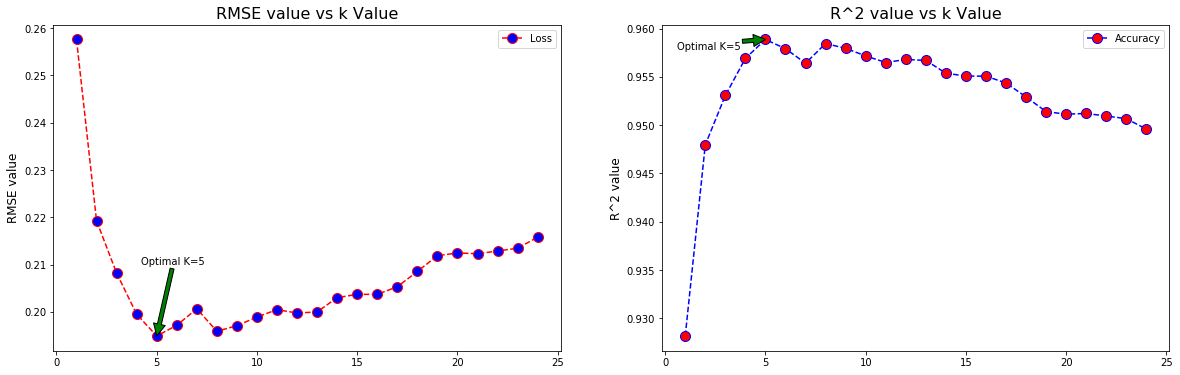

In [7]:
# plotting the rmse and R^2 values against k values: elbow curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6)) # ax2 = ax1.twinx()

ax1.plot(range(1,25), rmse, label='Loss', c='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10); 
ax1.annotate('Optimal K=5', xy=(5, min(rmse)), xytext=(4.2,.21), arrowprops=dict(facecolor='g', shrink=0.0005),
             clip_on=True, horizontalalignment='left')
ax1.set_title('RMSE value vs k Value', fontsize=16); ax1.set_ylabel('RMSE value', fontsize=12)

ax2.plot(range(1,25), accu, label='Accuracy', c='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
ax2.annotate('Optimal K=5', xy=(5, max(accu)), xytext=(-25, -10), arrowprops=dict(facecolor='g', shrink=0.0005), 
             clip_on=True, textcoords='offset points', horizontalalignment='right')
ax2.set_title('R^2 value vs k Value', fontsize=16); ax2.set_ylabel('R^2 value', fontsize=12)

ax1.legend(); ax2.legend(); plt.show()


When the value of k is very low (for example k=1), we get a very high RMSE value. The model overfits on the training data, which leads to a high error rate on the test set. On the other hand, for a high value of k, the model performs poorly on both train and test set. The RMSE value decreases as we increase the k value until one point: the graphs show that the validation error curve reaches a minima at a value of k = 5 (the RMSE is approximately 0.19553). This value of k is the optimum value of the model that give us the the best result. 

### 1.1.b. Note that we can also get **this value of k** using the `GridSearchCV` function.

In [8]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

knn_model = GridSearchCV(knn, params, cv=10)
knn_model.fit(X_train, y_train)

knn_model.best_params_

{'n_neighbors': 5}

### 1.2. K-Nearest Neighbors using Scikit-Learn Algorithms

In [9]:
# predicting on the test set and creating submission file
knn_model = neighbors.KNeighborsRegressor(n_neighbors = 5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print('KNN RMSE:', sqrt(mean_squared_error(y_test, y_pred)))
print('KNN MSE:', mean_squared_error(y_test, y_pred))
print('KNN MAE:', mean_absolute_error(y_test, y_pred))
print('KNN R^2:', r2_score(y_test, y_pred))


KNN RMSE: 0.19490252760136995
KNN MSE: 0.03798699526540278
KNN MAE: 0.07916331546700574
KNN R^2: 0.9588777585526671


### 1.3. K-Nearest Neighbors (KNN) implementation From Scratch

References: 
[Nandini Nuthalapati](https://github.com/NandiniNuthalapati/KNN-Regression-and-Classification-From-Scratch-in-Python/blob/master/K%20Nearest%20Neighbours.ipynb), [Onel Harrison
](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)

In [10]:
def knn(train, y_train, test, K):
    """
    Parameters:
        - train = X_train
        - test = X_test
        - y_train = y_train
        - K = the K-Nearest Neighbors
    Methods:
        - Compute the euclidien distance between a give individual(i) from the test sample and all the individuals of the training sample
        - Store this distance and the 'y_train' in the same table
            - Sort the table by the distance
                - Keep the K first lines of the table
                    - Finaly keep only the 'y_train' values on the K lines that are the most closer distance
        - predict the y_test value as the mean of the K y_train of the indididuals
    """
    
    y_pred = []
    for i in range(test.shape[0]):
        
        dist = np.zeros([train.shape[0]])
        for j in range(train.shape[1]):
            dist += [np.sqrt(pow((train.iloc[l, j]-test.iloc[i, j]),2)) for l in range(train.shape[0])]
            
        y_pred.append(np.mean(pd.DataFrame([y_train.iloc[:10], dist]).T.sort_values('Unnamed 0').iloc[:K].iloc[:,0]))

    return np.array(y_pred)


In [11]:
# Let's test our algorithm with some observations
y_pred = knn(X_train.iloc[:1000,:], y_train.iloc[:1000,], X_test.iloc[:10,:], 5)

print('KNN_Scratch MSE:', mean_squared_error(y_test.iloc[:10,], y_pred))
print('KNN_Scratch MAE:', mean_absolute_error(y_test.iloc[:10,], y_pred))
print('KNN_Scratch R^2:', r2_score(y_test.iloc[:10,], y_pred))


KNN_Scratch MSE: 0.07606731972143929
KNN_Scratch MAE: 0.20637592325874712
KNN_Scratch R^2: -0.36029648022627225


In [12]:
# Find the best k
mse = []
mae = []
r2_ = []
for i in range(2,13):
    y_pred = knn(X_train.iloc[:1200,:], y_train.iloc[:1200,], X_test.iloc[:70,:], i)

    mse.append(mean_squared_error(y_test.iloc[:70,], y_pred))
    mae.append(mean_absolute_error(y_test.iloc[:70,], y_pred))
    r2_.append(r2_score(y_test.iloc[:70,], y_pred))
    
    print('For k=', i , 'KNN_Scratch MSE:', mean_squared_error(y_test.iloc[:70,], y_pred))
    print('For k=', i , 'KNN_Scratch MAE:', mean_absolute_error(y_test.iloc[:70,], y_pred))
    print('For k=', i , 'KNN_Scratch R^2:', r2_score(y_test.iloc[:70,], y_pred))


For k= 2 KNN_Scratch MSE: 0.5805028402121757
For k= 2 KNN_Scratch MAE: 0.3309576378776138
For k= 2 KNN_Scratch R^2: -0.22378976048489285
For k= 3 KNN_Scratch MSE: 0.5808828738490075
For k= 3 KNN_Scratch MAE: 0.3313738425581611
For k= 3 KNN_Scratch R^2: -0.22459093016258924
For k= 4 KNN_Scratch MSE: 0.5203049479225151
For k= 4 KNN_Scratch MAE: 0.3075461245968273
For k= 4 KNN_Scratch R^2: -0.096883294084259
For k= 5 KNN_Scratch MSE: 0.5281458463515705
For k= 5 KNN_Scratch MAE: 0.30587048455294386
For k= 5 KNN_Scratch R^2: -0.11341312054811015
For k= 6 KNN_Scratch MSE: 0.5316055241221599
For k= 6 KNN_Scratch MAE: 0.305660717393948
For k= 6 KNN_Scratch R^2: -0.12070665631905841
For k= 7 KNN_Scratch MSE: 0.5323248263885995
For k= 7 KNN_Scratch MAE: 0.3056179077696631
For k= 7 KNN_Scratch R^2: -0.12222305673501599
For k= 8 KNN_Scratch MSE: 0.538770628184872
For k= 8 KNN_Scratch MAE: 0.30536105002395403
For k= 8 KNN_Scratch R^2: -0.13581180374874324
For k= 9 KNN_Scratch MSE: 0.543813958117407

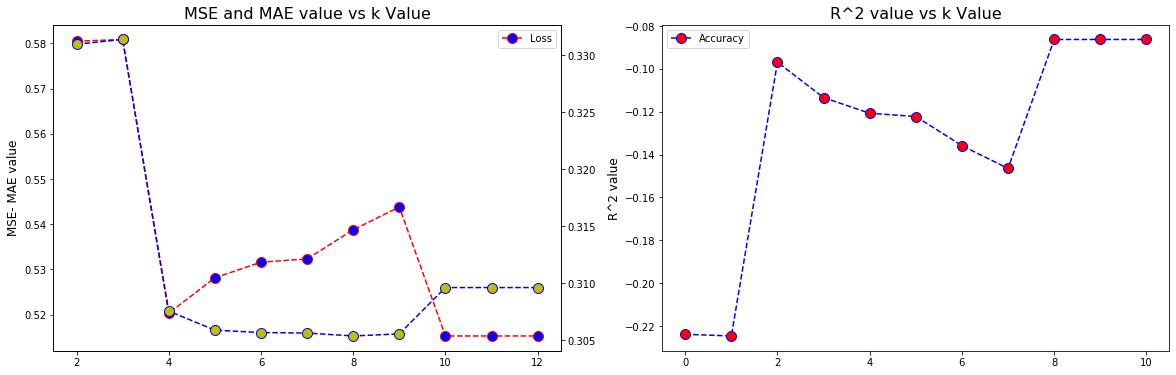

In [13]:
# plotting the rmse and R^2 values against k values: elbow curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax11 = ax1.twinx()

ax1.plot(range(2,13), mse, label='Loss', c='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10); 
ax11.plot(range(2,13), mae, label='Loss', c='blue', linestyle='dashed', marker='o', markerfacecolor='y', markersize=10); 
ax1.set_title('MSE and MAE value vs k Value', fontsize=16); ax1.set_ylabel('MSE- MAE value', fontsize=12)

ax2.plot(r2_, label='Accuracy', c='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
ax2.set_title('R^2 value vs k Value', fontsize=16); ax2.set_ylabel('R^2 value', fontsize=12)
ax1.legend(); ax2.legend(); plt.show()


In [15]:
# So,  4 is the optimal K from the manual implementation
y_pred = knn(X_train.iloc[:1200,:], y_train.iloc[:1200,], X_test.iloc[:70,:], 4)

print('For k=', i , 'KNN_Scratch MSE:', mean_squared_error(y_test.iloc[:70,], y_pred))
print('For k=', i , 'KNN_Scratch MAE:', mean_absolute_error(y_test.iloc[:70,], y_pred))
print('For k=', i , 'KNN_Scratch R^2:', r2_score(y_test.iloc[:70,], y_pred))

For k= 12 KNN_Scratch MSE: 0.5203049479225151
For k= 12 KNN_Scratch MAE: 0.3075461245968273
For k= 12 KNN_Scratch R^2: -0.096883294084259


**`But`** poors results: hight `MSE`, `MAE`, and low `R^2`

# VI. Support Vector Regression (SVR)
Reference: [scikit-learn](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-download-auto-examples-svm-plot-svm-regression-py)

In [26]:
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVR


## 1. Which is the optimal `Penalty parameter` C of the error term with which `kernel` option?

In [7]:
svr_rbf_score = []
svr_lin_score = []
svr_pol_score = []
mean_absolute_errorn range(1,11):
    svr_rbf = SVR(kernel='rbf', C=c, gamma=0.1, tol=0.001, epsilon=.1).fit(X_train, y_train)
    svr_rbf_score.append(svr_rbf.score(X_test, y_test))
    
    svr_lin = SVR(kernel='linear', C=c, gamma='auto').fit(X_train, y_train)
    svr_lin_score.append(svr_lin.score(X_test, y_test))
    
    #svr_poly = SVR(kernel='poly', C=c, gamma='auto', degree=2, epsilon=.1, coef0=1).fit(X_train, y_train)
    #svr_pol_score.append(svr_poly.score(X_test, y_test))

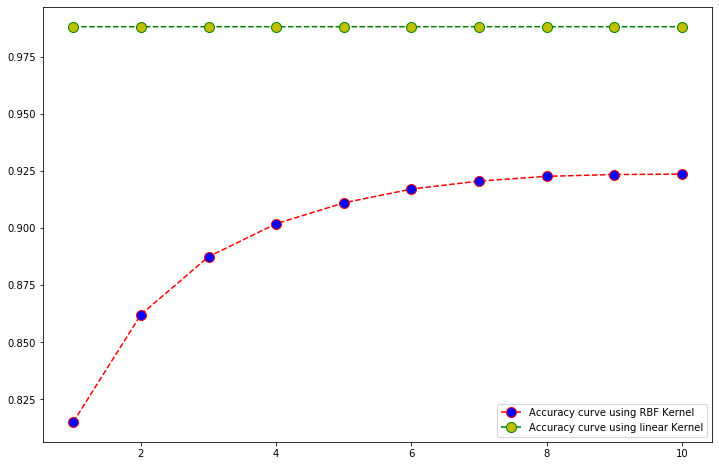

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
#ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax.plot(range(1,11),svr_rbf_score, label='Accuracy curve using RBF Kernel', c='r', linestyle='dashed', marker='o', markerfacecolor='b', markersize=10)
ax.plot(range(1,11), svr_lin_score, label='Accuracy curve using linear Kernel', c='g', linestyle='dashed', marker='o', markerfacecolor='y', markersize=10)

ax.legend(); plt.show()

## 2. Evaluate the performance using 10-Folders of Cross-Validation 

In [21]:
X = np.array(ir_fifa_scaled.drop(['value'], axis=1))
y = np.array(ir_fifa_scaled.value).reshape(16643,)

In [22]:
# When kernel='rbf'
scores = []
k = 10

svr_rbf = SVR(kernel='rbf', gamma='auto', C=3)
cv = KFold(n_splits=k, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    svr_rbf.fit(X_train, y_train)
    scores.append(svr_rbf.score(X_test, y_test))
    print("Train length: {}, test length: {}, Score value: {}".format(len(train_index), len(test_index), svr_rbf.score(X_test, y_test)))
print()
print('Mean Score of SVR with "rbt" kernel option is:',np.mean(scores))

Train length: 14978, test length: 1665, Score value: 0.9376591212859375
Train length: 14978, test length: 1665, Score value: 0.8670995621863367
Train length: 14978, test length: 1665, Score value: 0.9794315167495471
Train length: 14979, test length: 1664, Score value: 0.9522679108855632
Train length: 14979, test length: 1664, Score value: 0.984103053245325
Train length: 14979, test length: 1664, Score value: 0.9867290393742193
Train length: 14979, test length: 1664, Score value: 0.827863747256562
Train length: 14979, test length: 1664, Score value: 0.8909184588366658
Train length: 14979, test length: 1664, Score value: 0.9406323926014808
Train length: 14979, test length: 1664, Score value: 0.8541804652960135

Mean Score of SVR with "rbt" kernel option is: 0.922088526771765


In [24]:
# When kernel = 'linear'
scores = []
k = 10

svr_linear = SVR(kernel='linear', gamma='auto', C=3)
cv = KFold(n_splits=k, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    svr_linear.fit(X_train, y_train)
    scores.append(svr_linear.score(X_test, y_test))
    print("Train length: {}, test length: {}, Score value: {}".format(len(train_index), len(test_index), svr_linear.score(X_test, y_test)))
print()
print("Mean Score of SVR with 'linear' kernel option is:", np.mean(scores))

Train length: 14978, test length: 1665, Score value: 0.9914358825257809
Train length: 14978, test length: 1665, Score value: 0.9877593093981106
Train length: 14978, test length: 1665, Score value: 0.985381984823899
Train length: 14979, test length: 1664, Score value: 0.9878942564480283
Train length: 14979, test length: 1664, Score value: 0.9895101054728683
Train length: 14979, test length: 1664, Score value: 0.9868270719483503
Train length: 14979, test length: 1664, Score value: 0.990891350628269
Train length: 14979, test length: 1664, Score value: 0.9912085987282444
Train length: 14979, test length: 1664, Score value: 0.9896810326561483
Train length: 14979, test length: 1664, Score value: 0.989636910621576

Mean Score of SVR with 'linear' kernel option is: 0.9890226503251276


In [140]:
print('Cross-validation score: \n{}\n '.format(cross_val_score(svr_rbf, X, y, cv=10)))

Cross-validation score: 
[ 9.67069788e-01  9.09678241e-01  8.52321971e-01  6.38197791e-01
  4.51383394e-01  3.16223997e-01  8.17264359e-02 -4.54987560e-01
 -2.96408643e+00 -1.30693936e+02]
 


In [63]:
print('Cross-validation predictive:\n', cross_val_predict(svr_rbf, X, y, cv=10))

Cross-validation predictive:
 [17.94697272 10.16268237 17.6300598  ... -0.55884669 -0.59362386
 -0.60272033]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(ir_fifa_scaled.drop('value', axis=1),
                                                    ir_fifa_scaled.value,
                                                    test_size=0.2, random_state=0)

In [28]:
svr_rbf = SVR(kernel='rbf', C=5, gamma=0.1, tol=0.001, epsilon=.1).fit(X_train, y_train)
svr_lin = SVR(kernel='linear', gamma='auto', tol=0.001, epsilon=.1).fit(X_train, y_train)
svr_poly = SVR(kernel='poly', gamma='auto', degree=2, tol=0.001, epsilon=.1, coef0=1).fit(X_train, y_train)

print("SVR score when kernel='rbf' is:", svr_rbf.score(X_test, y_test))
print("SVR score when kernel='linear' is:", svr_lin.score(X_test, y_test))
print("SVR score when kernel='poly' is:", svr_poly.score(X_test, y_test))

SVR score when kernel='rbf' is: 0.9110462711818061
SVR score when kernel='linear' is: 0.9882110676443865
SVR score when kernel='poly' is: 0.992936575975547


In [29]:
print('SVR MSE', mean_squared_error(y_test, svr_lin.predict(X_test)))
print('SVR MAE', mean_absolute_error(y_test, svr_lin.predict(X_test)))

SVR MSE 0.010890119356708609
SVR MAE 0.052376469255082214


In [30]:
pd.DataFrame([svr_rbf.predict(X_test),svr_lin.predict(X_test),svr_poly.predict(X_test)])

0         1         2         3         4         5         6     \
0 -0.239825 -0.352321 -0.374980 -0.172959  0.072527 -0.145727  0.405013   
1 -0.362011 -0.298676 -0.370929 -0.130510  0.111016 -0.503285  0.304571   
2 -0.397561 -0.262814 -0.466629 -0.158990  0.053151 -0.249550  0.330592   

       7         8         9     ...      3319      3320      3321      3322  \
0  0.045364  0.114427 -0.344827  ...  0.267870 -0.385388 -0.266855 -0.338510   
1  0.054441  0.029718 -0.283045  ... -0.009603 -0.299872 -0.315210 -0.283288   
2  0.081473  0.054497 -0.322935  ...  0.067831 -0.330023 -0.380332 -0.302621   

       3323      3324      3325      3326      3327      3328  
0  5.592753 -0.408048  0.829149 -0.397221  0.640324 -0.460241  
1  6.862805 -0.307070  0.878308 -0.327774  0.761717 -0.382310  
2  7.085519 -0.370781  0.887242 -0.435003  0.629536 -0.458748  

[3 rows x 3329 columns]

# VII. Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split


In [2]:
def normalize(x):
    """
    Standardize features by removing the mean and scaling to unit variance
    We get the same result when we use the Sklern function: StandardScaler()
    """
    scaled_x = (x-x.mean(axis=0))/x.std(axis=0)
    return scaled_x


In [3]:
ir_fifa = pd.read_csv('ir_fifa.csv')
ir_fifa_scaled = normalize(ir_fifa.drop('name', axis=1))

X_train, X_test, y_train, y_test = train_test_split(ir_fifa_scaled.drop('value', axis=1),
                                                    ir_fifa_scaled.value,
                                                    test_size=0.2, random_state=0)

print('Our train and test samples have respectively {} and {} observations'.format(
    X_train.shape[0],X_test.shape[0]))

Our train and test samples have respectively 13314 and 3329 observations


## 1. K-Means Clustering

### 1.1. Find the number of optimal clusters using K-Means from Scikit-Learn

In [4]:
from sklearn.cluster import KMeans

inertie = []
for i in range(1,16): # 15 cluster
    kmeans = KMeans(n_clusters = i, init='k-means++', n_init=100, max_iter=1000, 
                    random_state=0, algorithm='full') 
    kmeans.fit(ir_fifa_scaled)
    inertie.append(kmeans.inertia_)

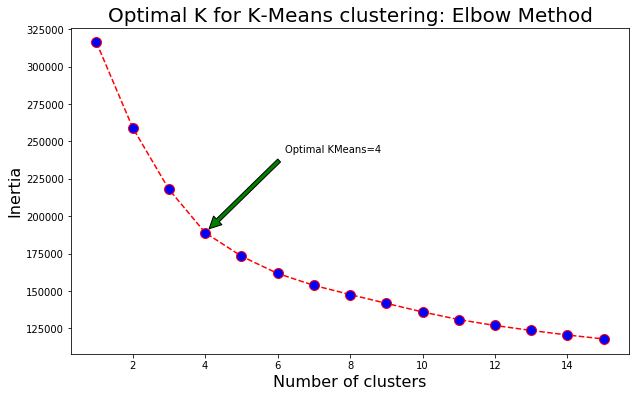

In [10]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(range(1,16), inertie, c='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
ax.annotate('Optimal KMeans=4', xy=(4, inertie[3]), xytext=(80, 80), arrowprops=dict(facecolor='g', shrink=0.05), 
            clip_on=True, textcoords='offset points')
plt.title('Optimal K for K-Means clustering: Elbow Method', fontsize=20); plt.xlabel('Number of clusters', fontsize=16)
plt.ylabel('Inertia', fontsize=16); plt.show()

### 1.2. K-Means Implementation From Scratch: manual implement

In [4]:
def K_Means(K, kmean_df):
    
    """
    Parameters:
    - K: the number of class
    - kmean_df: DataFrame
    
    Return the K predicted class
    """
    
    items = range(K)
    kmean_df['reach_class'] = [items[random.randrange(K)] for x in range(kmean_df.shape[0])]

    for i in range(100):

        centroid = {}
        for j in kmean_df.columns.tolist()[:-1]:
            centroid[j] = [np.mean(kmean_df[kmean_df.reach_class==k][j]) for k in range(K)]

        dist = np.zeros([K, kmean_df.shape[0]])
        for key, value in zip(centroid.keys(), centroid.values()):
            dist += [(kmean_df[key]-value[k])**2 for k in range(K)]

        kmean_df['new_class'] = np.argmin(np.sqrt(dist), axis=0)
        if (kmean_df['reach_class'] == kmean_df['new_class']).all():
            print('Stop iterated! We have good K-Means at the "{}th" iteration.'.format(i+1))
            kmean_df.drop('new_class', axis=1, inplace=True)
            break

        else:
            kmean_df['reach_class'] = kmean_df['new_class']
            kmean_df.drop('new_class', axis=1, inplace=True)
            
    return np.array(kmean_df['reach_class'])

### 1.3. Let's first test our algorithm in two variables

Stop iterated! We have good K-Means at the "16th" iteration.


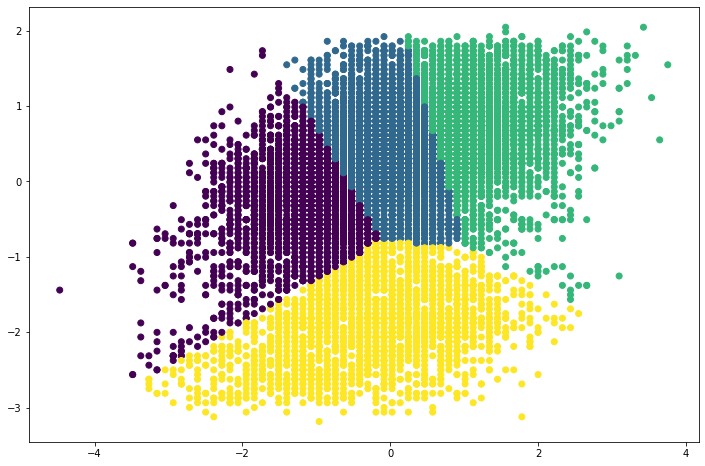

In [5]:
# 'reactions' vs 'stamina'
class_pred = K_Means(K=4, kmean_df=ir_fifa_scaled[['reactions','stamina']].copy())

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(ir_fifa_scaled.reactions, ir_fifa_scaled.stamina, c=class_pred)
plt.show() 

In [8]:
print('How many players for each class?')
players_class = ir_fifa.copy()
players_class['class_pred'] = class_pred
players_class['class_pred'].value_counts()

How many players for each class?


1    6664
2    4086
0    3599
3    2294
Name: class_pred, dtype: int64

Stop iterated! We have good K-Means at the "38th" iteration.


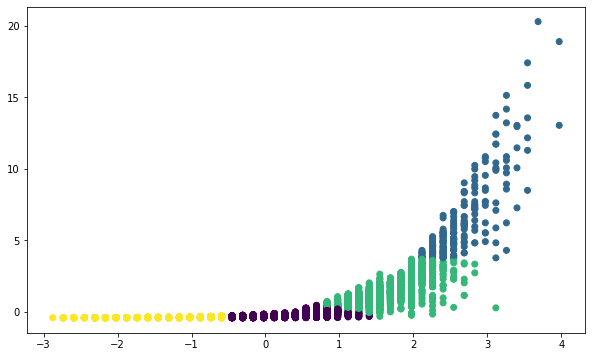

In [9]:
# 'overall' vs 'value'
class_pred = K_Means(K=4, kmean_df=ir_fifa_scaled[['overall','value']].copy())

fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(ir_fifa_scaled.overall, ir_fifa_scaled.value, c=class_pred)
plt.show() 

In [10]:
print('How many players for each class?')

players_class = ir_fifa.copy()
players_class['class_pred'] = class_pred
players_class['class_pred'].value_counts()

How many players for each class?


0    9184
3    4796
2    2438
1     225
Name: class_pred, dtype: int64

Stop iterated! We have good K-Means at the "17th" iteration.


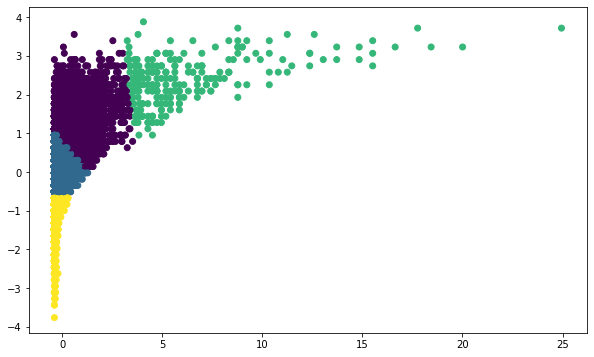

In [11]:
# 'overall' vs 'value'
class_pred = K_Means(K=4, kmean_df=ir_fifa_scaled[['wage','potential']].copy())

fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(ir_fifa_scaled.wage, ir_fifa_scaled.potential, c=class_pred)
plt.show() 

In [12]:
print('How many players for each class?')

players_class = ir_fifa.copy()
players_class['class_pred'] = class_pred
players_class['class_pred'].value_counts()

How many players for each class?


1    8244
3    4845
0    3310
2     244
Name: class_pred, dtype: int64

In [13]:
players_class.loc[players_class.class_pred==0][['wage','potential']].mean()

wage         21925.075529
potential       79.269184
dtype: float64

### 1.4. Aplly the algorithm on the full dataset

In [14]:
class_pred = K_Means(K=4, kmean_df=ir_fifa_scaled.copy())

Stop iterated! We have good K-Means at the "35th" iteration.


In [15]:
players_class = ir_fifa.copy()
players_class['class_pred'] = class_pred
players_class['class_pred'].value_counts()

0    7670
1    6230
3    1876
2     867
Name: class_pred, dtype: int64

#### 1.4.1. Visualisation

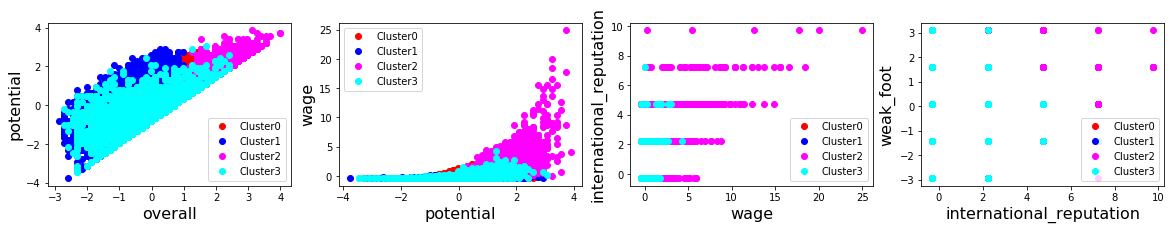

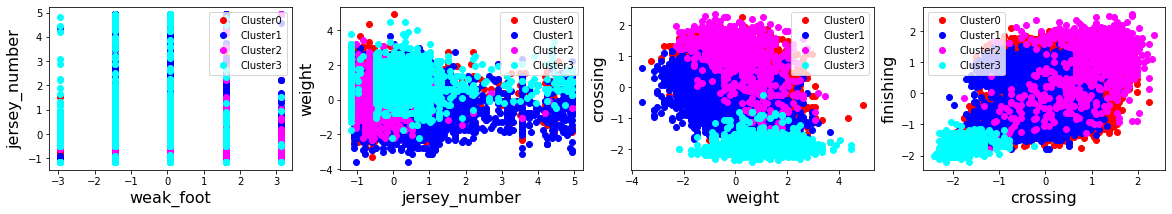

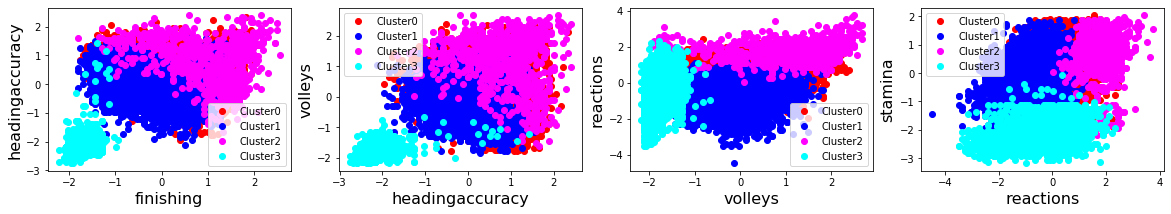

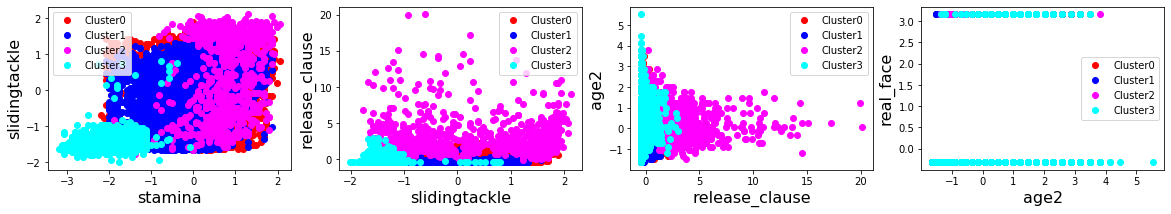

In [18]:
kmean_df = ir_fifa_scaled.copy()
kmean_np = np.array(kmean_df)

l = 2
for length in range(12):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,3))
    variables = kmean_df.columns.tolist()

    for i, j in zip((ax1, ax2, ax3, ax4), range(l, kmean_np.shape[1]+1)):
        i.plot(kmean_np[class_pred == 0,j], kmean_np[class_pred==0,j+1], 'o', c='red', label='Cluster0');
        i.plot(kmean_np[class_pred == 1,j], kmean_np[class_pred==1,j+1], 'o', c='blue', label='Cluster1');
        i.plot(kmean_np[class_pred == 2,j], kmean_np[class_pred==2,j+1], 'o', c='magenta', label='Cluster2');
        i.plot(kmean_np[class_pred == 3,j], kmean_np[class_pred==3,j+1], 'o', c='cyan', label='Cluster3');
        i.set_xlabel(xlabel=variables[j], fontsize=16)
        i.set_ylabel(ylabel=variables[j+1], fontsize=16)
        i.legend()
        
    l += 4
    if l >= kmean_df.shape[1]-2:
        break

#### 1.4.2. Count the number of player in each class

In [19]:
players_class = ir_fifa.copy()
players_class['class_pred'] = class_pred

class_0,class_1 = players_class.class_pred.value_counts()[0],players_class.class_pred.value_counts()[1]
class_2,class_3 = players_class.class_pred.value_counts()[2],players_class.class_pred.value_counts()[3]

print('Number of players by class')
pd.Series([class_0,class_1,class_2,class_3], index=['class_0','class_1','class_2','class_3'])

Number of players by class


class_0    7670
class_1    6230
class_2     867
class_3    1876
dtype: int64

In [20]:
players_class[['name','class_pred']].T

0                  1          2       3             4      \
name        L. Messi  Cristiano Ronaldo  Neymar Jr  De Gea  K. De Bruyne   
class_pred         2                  2          2       2             2   

                5          6          7             8         9      ...  \
name        E. Hazard  L. Modrić  L. Suárez  Sergio Ramos  J. Oblak  ...   
class_pred          2          2          2             2         2  ...   

                 16633       16634         16635     16636     16637  \
name        D. Holland  J. Livesey  M. Baldisimo  J. Young  D. Walsh   
class_pred           1           3             1         1         1   

                   16638               16639      16640           16641  \
name        J. Lundstram  N. Christoffersson  B. Worman  D. Walker-Rice   
class_pred             1                   1          1               1   

                16642  
name        G. Nugent  
class_pred          1  

[2 rows x 16643 columns]

#### 1.4.3. Search for possible substitute players
- The idea of the next function is to find a list of `football players who can replace a given player`. 
- Just give the name of the one you want to replace after running the code (with only one clic). 
- The function will return a table containing players with their characteristics that may have the same characteristics as the player you want to replace. 

In [21]:
players_class = ir_fifa
players_class['class_pred'] = class_pred

def replacement(player_name):
    """
    Return a table containing players with their characteristics that may have the same characteristics with the give player.
    """
    for k in range(4):
        if players_class.loc[(players_class.class_pred==k)&(players_class.name==player_name)].class_pred.unique()==k:
            
            return players_class.loc[players_class.class_pred==k]


In [26]:
name = input('Which football player are you looking for? ')

replacement(name).head(10)

Which football player are you looking for?  Z. Feddal


name  age       value  overall  potential     wage  \
226  Juiano Mestres   34   6500000.0       82         82  39000.0   
303          Jardel   32  12500000.0       82         82  17000.0   
373       F. Smolov   28  18500000.0       81         81   1000.0   
411  Welington Dano   30  10500000.0       80         80  34000.0   
412  Everton Andrão   34   4500000.0       80         80  34000.0   
422            Raúl   28  12000000.0       80         80  19000.0   
440   T. Stepanenko   28  12000000.0       80         80   1000.0   
442       Z. Feddal   28  12000000.0       80         80  29000.0   
447       E. Zahavi   30  14500000.0       80         80  24000.0   
459         Ismaily   28  11500000.0       80         80   1000.0   

     international_reputation  weak_foot  jersey_number  weight  ...  \
226                       1.0        3.0            3.0   181.0  ...   
303                       2.0        2.0           33.0   192.0  ...   
373                       1.0        4.0           11.0   176.0  ...   
411                       1.0        4.0            5.0   152.0  ...   
412                       1.0        4.0            6.0   165.0  ...   
422                       1.0        3.0           34.0   179.0  ...   
440                       1.0        3.0            6.0   168.0  ...   
442                       1.0        2.0            4.0   183.0  ...   
447                       1.0        4.0            7.0   157.0  ...   
459                       1.0        2.0           31.0   181.0  ...   

     finishing  headingaccuracy  volleys  reactions  stamina  slidingtackle  \
226       56.0             83.0     63.0       78.0     76.0           84.0   
303       38.0             85.0     27.0       77.0     68.0           78.0   
373       84.0             70.0     79.0       74.0     74.0           24.0   
411       51.0             69.0     47.0       80.0     89.0           81.0   
412       58.0             59.0     58.0       78.0     89.0           77.0   
422       50.0             86.0     49.0       77.0     75.0           76.0   
440       53.0             69.0     56.0       78.0     82.0           77.0   
442       40.0             79.0     39.0       68.0     64.0           78.0   
447       83.0             68.0     77.0       78.0     74.0           34.0   
459       60.0             59.0     55.0       81.0     88.0           75.0   

     release_clause  age2  real_face  class_pred  
226      12400000.0  1156          0           0  
303      25000000.0  1024          0           0  
373      38900000.0   784          0           0  
411      20000000.0   900          0           0  
412       8500000.0  1156          0           0  
422      24000000.0   784          0           0  
440      25200000.0   784          0           0  
442      25200000.0   784          1           0  
447      31200000.0   900          0           0  
459      24200000.0   784          0           0  

[10 rows x 21 columns]

In [28]:
name = input('Which football player are you looking for? ')

replacement(name).head(10)

Which football player are you looking for?  Neymar Jr


/Users/djibybalde/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if __name__ == '__main__':


name  age        value  overall  potential      wage  \
0           L. Messi   31  110500000.0       94         94  565000.0   
1  Cristiano Ronaldo   33   77000000.0       94         94  405000.0   
2          Neymar Jr   26  118500000.0       92         93  290000.0   
3             De Gea   27   72000000.0       91         93  260000.0   
4       K. De Bruyne   27  102000000.0       91         92  355000.0   
5          E. Hazard   27   93000000.0       91         91  340000.0   
6          L. Modrić   32   67000000.0       91         91  420000.0   
7          L. Suárez   31   80000000.0       91         91  455000.0   
8       Sergio Ramos   32   51000000.0       91         91  380000.0   
9           J. Oblak   25   68000000.0       90         93   94000.0   

   international_reputation  weak_foot  jersey_number  weight  ...  finishing  \
0                       5.0        4.0           10.0   159.0  ...       95.0   
1                       5.0        4.0            7.0   183.0  ...       94.0   
2                       5.0        5.0           10.0   150.0  ...       87.0   
3                       4.0        3.0            1.0   168.0  ...       13.0   
4                       4.0        5.0            7.0   154.0  ...       82.0   
5                       4.0        4.0           10.0   163.0  ...       84.0   
6                       4.0        4.0           10.0   146.0  ...       72.0   
7                       5.0        4.0            9.0   190.0  ...       93.0   
8                       4.0        3.0           15.0   181.0  ...       60.0   
9                       3.0        3.0            1.0   192.0  ...       11.0   

   headingaccuracy  volleys  reactions  stamina  slidingtackle  \
0             70.0     86.0       95.0     72.0           26.0   
1             89.0     87.0       96.0     88.0           23.0   
2             62.0     84.0       94.0     81.0           33.0   
3             21.0     13.0       90.0     43.0           13.0   
4             55.0     82.0       91.0     90.0           51.0   
5             61.0     80.0       90.0     83.0           22.0   
6             55.0     76.0       90.0     89.0           73.0   
7             77.0     88.0       92.0     90.0           38.0   
8             91.0     66.0       85.0     84.0           91.0   
9             15.0     13.0       86.0     41.0           18.0   

   release_clause  age2  real_face  class_pred  
0     226500000.0   961          1           2  
1     127100000.0  1089          1           2  
2     228100000.0   676          1           2  
3     138600000.0   729          1           2  
4     196400000.0   729          1           2  
5     172100000.0   729          1           2  
6     137400000.0  1024          1           2  
7     164000000.0   961          1           2  
8     104600000.0  1024          1           2  
9     144500000.0   625          1           2  

[10 rows x 21 columns]

### 1.5. The results provided by the KMeans function from `sklearn.cluster`

In [88]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, n_init=100, max_iter=30000, precompute_distances=True, 
            random_state=0,  algorithm='full')

kmean_np = np.array(kmean_df)

km.fit(kmean_np)
y_pred = km.predict(kmean_np)

# get centroids
centroids = km.cluster_centers_


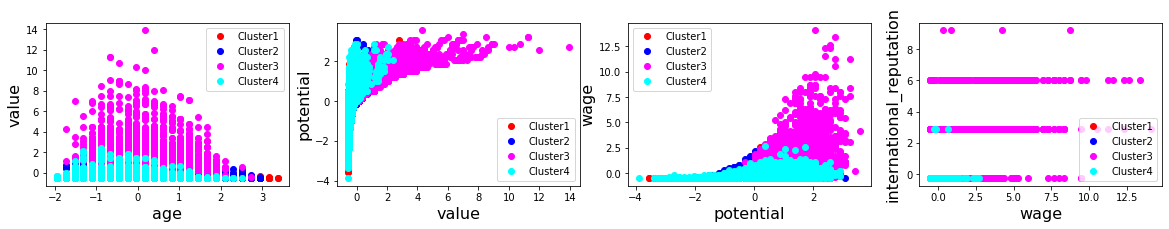

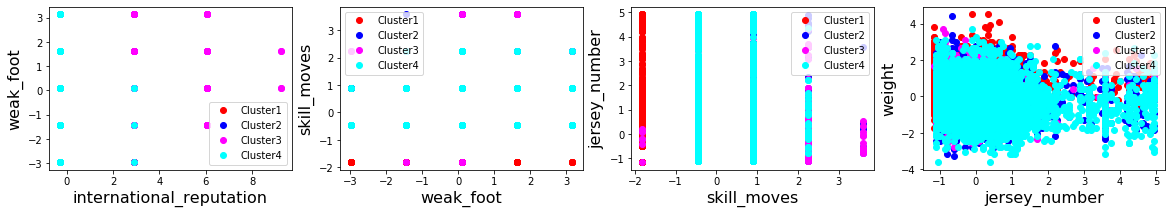

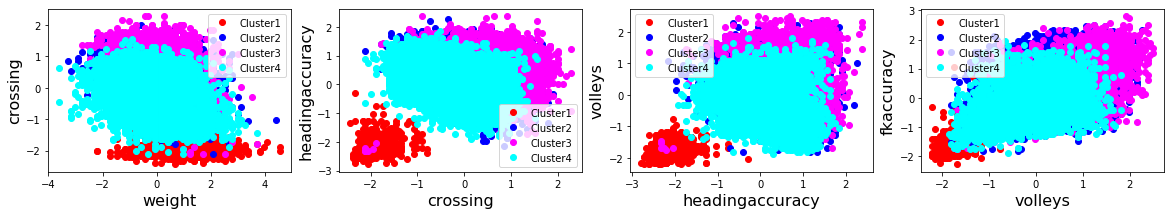

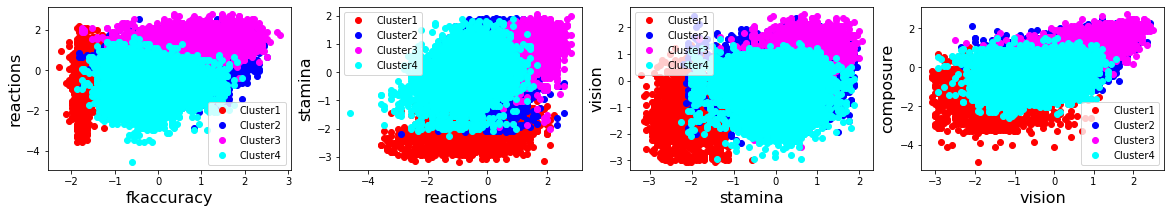

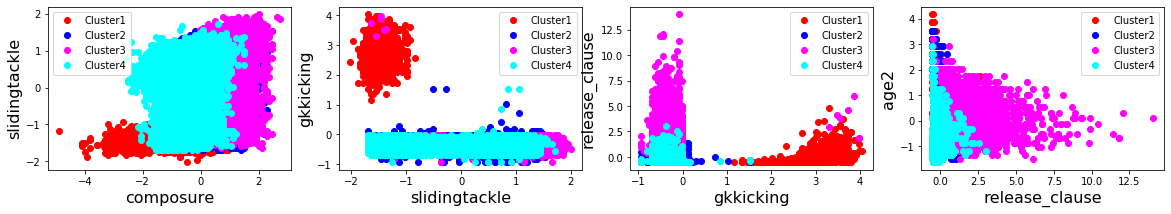

In [89]:
l = 0
for length in range(12):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,3))
    variables = kmean_df.columns.tolist()

    for i, j in zip((ax1, ax2, ax3, ax4), range(l, kmean_np.shape[1]+1)):
        i.plot(kmean_np[y_pred == 0,j], kmean_np[y_pred==0,j+1], 'o', c='red', label='Cluster1');
        i.plot(kmean_np[y_pred == 1,j], kmean_np[y_pred==1,j+1], 'o', c='blue', label='Cluster2');
        i.plot(kmean_np[y_pred == 2,j], kmean_np[y_pred==2,j+1], 'o', c='magenta', label='Cluster3');
        i.plot(kmean_np[y_pred == 3,j], kmean_np[y_pred==3,j+1], 'o', c='cyan', label='Cluster4');
        i.set_xlabel(xlabel=variables[j], fontsize=16)
        i.set_ylabel(ylabel=variables[j+1], fontsize=16)
        i.legend()
        
    l += 4
    if l >= kmean_df.shape[1]-2:
        break

## 2. Hierarchical Clustering: an alternative of K-Means
Reference: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering


In [30]:
ir_fifa_scaled = normalize(ir_fifa.drop('name', axis=1))
ir_fifa_scaled['name'] = ir_fifa.name

In [31]:
train_hier, test_hier = train_test_split(ir_fifa_scaled, test_size=0.0012, random_state=0)

train_hier.shape, test_hier.shape

((16623, 21), (20, 21))

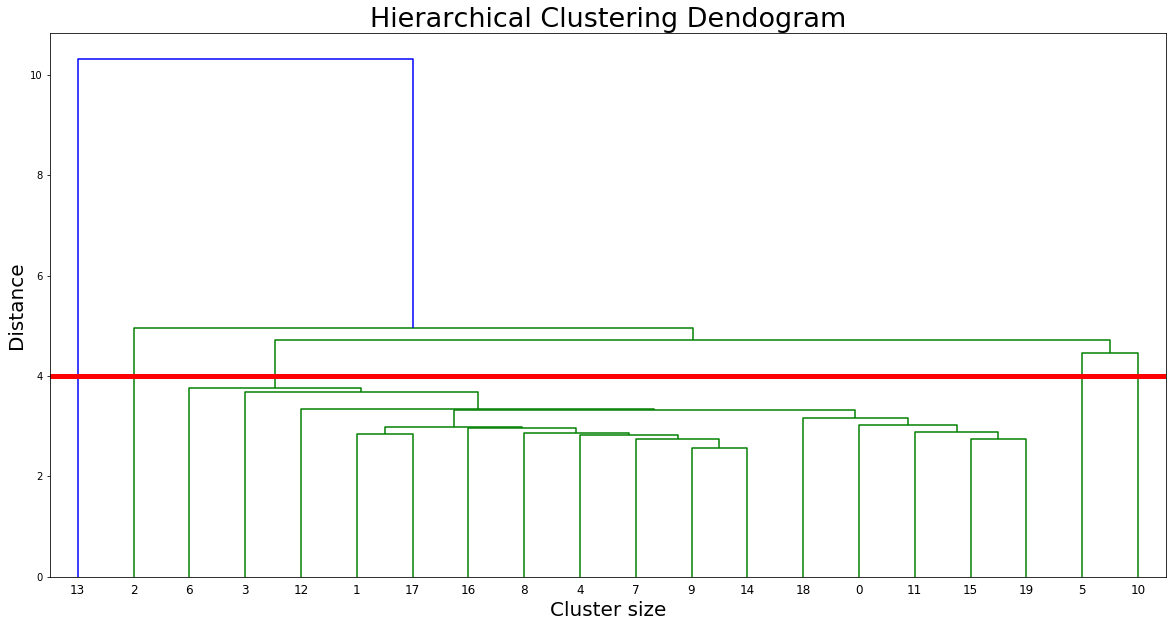

In [32]:
linked = linkage(test_hier.drop('name', axis=1), 'single') # complete

labelList = range(test_hier.drop('name', axis=1).shape[0])

plt.figure(figsize=(20, 10))
dendrogram(linked, orientation='top',labels=labelList,
            distance_sort='descending', show_leaf_counts=True)

plt.plot([linked.min(), 50000],[4, 4], c='r', linewidth=5)
plt.title('Hierarchical Clustering Dendogram', fontsize=27)
plt.xlabel('Cluster size', fontsize=20); plt.ylabel('Distance', fontsize=20)

plt.show()

In [33]:
for l, n in zip(range(test_hier.drop('name', axis=1).shape[0]), test_hier.name.tolist()):
    print(l, n)

0 H. Türkmen
1 U. Jenssen
2 P. Leciejewski
3 J. Drolè
4 Rodrigo Galo
5 J. McCombe
6 R. Alvarado
7 A. Niane
8 P. Cuadra
9 S. Davies
10 Jin Hui
11 P. Beruatto
12 S. García
13 M. Götze
14 K. Drygas
15 Parra
16 Fransérgio
17 I. De Santis
18 M. Al Fatil
19 A. Bates


In [34]:
ir_fifa_scaled = normalize(ir_fifa.drop('name', axis=1))
ir_fifa_scaled['name'] = ir_fifa.name
ir_fifa_scaled.sort_values('value', ascending=False, inplace=True)

test_hier = ir_fifa_scaled.iloc[:15,:]

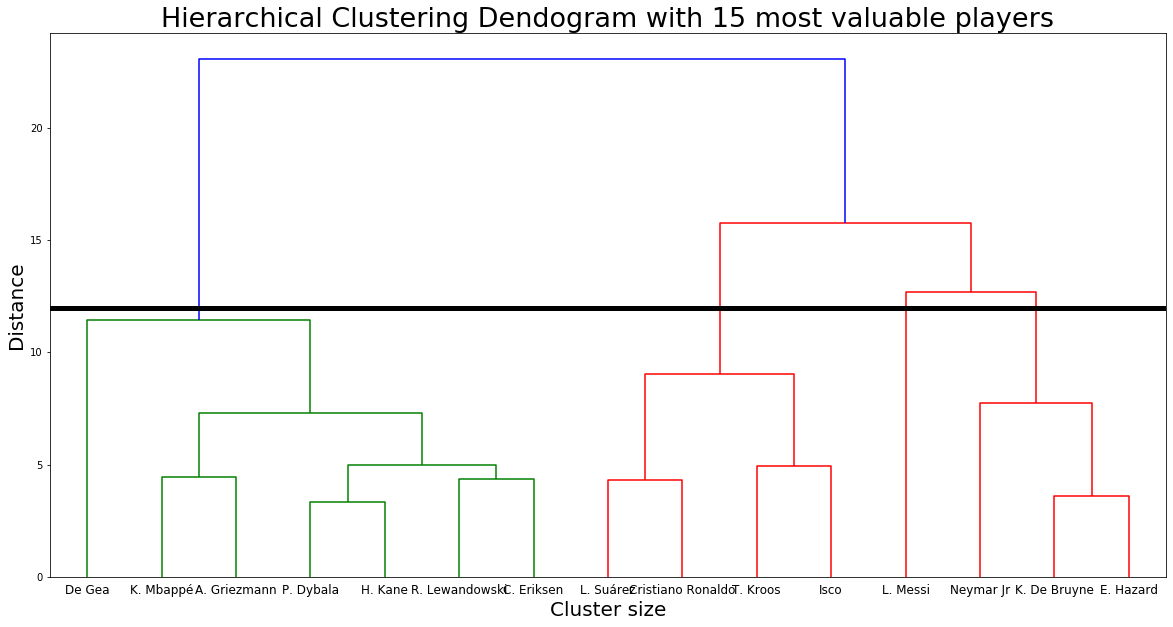

In [35]:
linked = linkage(test_hier.drop('name', axis=1), 'complete') # complete

labelList = test_hier.name.tolist()

plt.figure(figsize=(20, 10))
dendrogram(linked, orientation='top',labels=labelList,
            distance_sort='descending', show_leaf_counts=True)

plt.plot([linked.min(), 50000],[12, 12], c='k', linewidth=5)
plt.title('Hierarchical Clustering Dendogram with 15 most valuable players', fontsize=27)
plt.xlabel('Cluster size', fontsize=20); plt.ylabel('Distance', fontsize=20)

plt.show()

In [36]:
test_hier.name

2             Neymar Jr
0              L. Messi
4          K. De Bruyne
5             E. Hazard
15            P. Dybala
16              H. Kane
25            K. Mbappé
7             L. Suárez
17         A. Griezmann
1     Cristiano Ronaldo
10       R. Lewandowski
11             T. Kroos
30           C. Eriksen
29                 Isco
3                De Gea
Name: name, dtype: object

In [37]:
for l, n in zip(range(test_hier.drop('name', axis=1).shape[0]), test_hier.name.tolist()):
    print(l, n)

0 Neymar Jr
1 L. Messi
2 K. De Bruyne
3 E. Hazard
4 P. Dybala
5 H. Kane
6 K. Mbappé
7 L. Suárez
8 A. Griezmann
9 Cristiano Ronaldo
10 R. Lewandowski
11 T. Kroos
12 C. Eriksen
13 Isco
14 De Gea


In [38]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(linked)

array([4, 4, 3, 3, 3, 3, 2, 2, 1, 2, 2, 1, 0, 0])

In [39]:
train_hier, test_hier = train_test_split(ir_fifa_scaled, test_size=0.012, random_state=0)

train_hier.shape, test_hier.shape

((16443, 21), (200, 21))

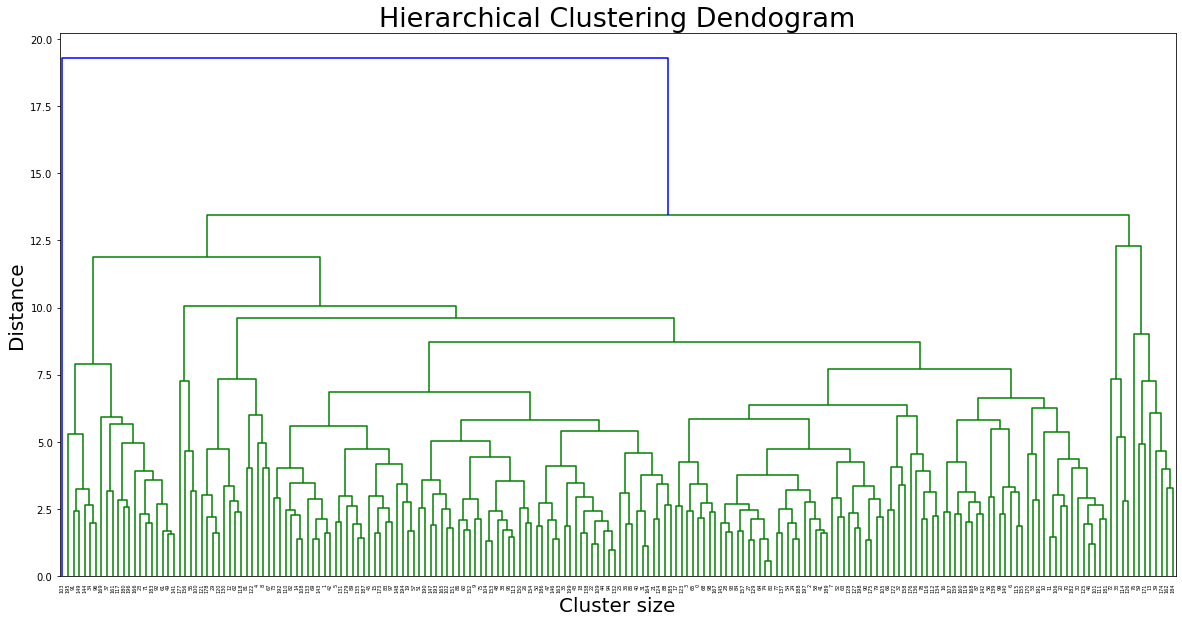

In [40]:
linked = linkage(test_hier.drop('name', axis=1), 'complete') # complete

labelList = range(test_hier.drop('name', axis=1).shape[0])

plt.figure(figsize=(20, 10))
dendrogram(linked, orientation='top',labels=labelList,
            distance_sort='descending', show_leaf_counts=True)

#plt.plot([linked.min(), 50000],[3.5, 3.5], c='r', linewidth=5)
plt.title('Hierarchical Clustering Dendogram', fontsize=27)
plt.xlabel('Cluster size', fontsize=20); plt.ylabel('Distance', fontsize=20)

plt.show()

In [41]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(test_hier.drop('name', axis=1))

array([0, 1, 0, 0, 0, 1, 4, 0, 0, 0, 0, 4, 0, 2, 1, 1, 0, 0, 1, 4, 4, 1,
       1, 3, 0, 0, 1, 0, 4, 0, 0, 1, 0, 0, 3, 1, 0, 3, 4, 2, 1, 0, 1, 1,
       1, 1, 0, 1, 4, 3, 1, 4, 0, 4, 0, 1, 4, 4, 0, 2, 4, 3, 0, 0, 0, 0,
       0, 0, 0, 1, 4, 3, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 4,
       1, 1, 0, 3, 3, 4, 1, 4, 3, 1, 0, 4, 1, 0, 0, 2, 4, 0, 4, 0, 1, 1,
       1, 0, 0, 4, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 4, 4, 3, 4, 1, 3, 4, 1, 4, 1, 3, 4, 0, 4, 4,
       1, 4, 1, 4, 0, 0, 4, 3, 2, 1, 1, 1, 3, 0, 0, 3, 1, 2, 0, 1, 2, 0,
       1, 0, 0, 1, 3, 0, 0, 3, 2, 1, 1, 1, 0, 0, 4, 4, 1, 4, 4, 3, 3, 0,
       0, 1])

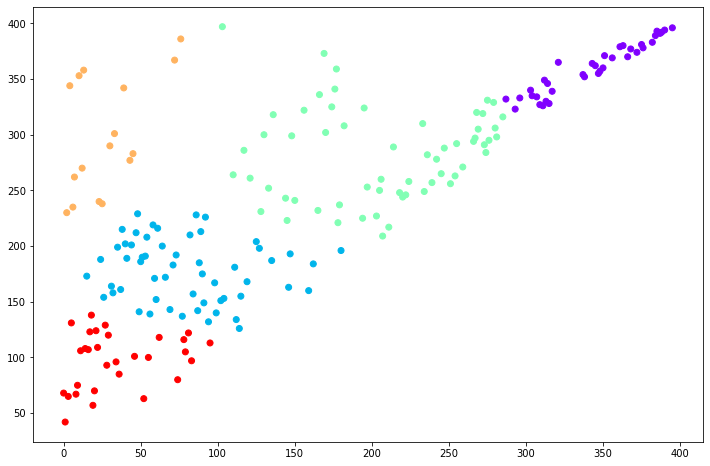

In [42]:
clas_pred = cluster.fit_predict(linked)
plt.figure(figsize=(12, 8))

plt.scatter(linked[:,0], linked[:,1], c=clas_pred, cmap='rainbow')
plt.show()

# VIII. Convolution Neural Network architecture using tensorflow

In [43]:
# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /private/var/folders/9_/yfq22_y129j9sqbz2v54fy3c0000gn/T/pip-req-build-21rr30kb
  Running command git clone -q https://github.com/tensorflow/docs /private/var/folders/9_/yfq22_y129j9sqbz2v54fy3c0000gn/T/pip-req-build-21rr30kb
  Stored in directory: /private/var/folders/9_/yfq22_y129j9sqbz2v54fy3c0000gn/T/pip-ephem-wheel-cache-_j6yg398/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0-rc1


In [3]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [4]:
def normalize(x):
    """
    Standardize features by removing the mean and scaling to unit variance
    We get the same result when we use the Sklern function: StandardScaler()
    """
    scaled_x = (x-x.mean(axis=0))/x.std(axis=0)
    return scaled_x


ir_fifa = pd.read_csv('ir_fifa.csv')
ir_ff = normalize(ir_fifa.drop('name', axis=1))
X_train, X_test, y_train, y_test = train_test_split(ir_ff.drop('value', axis=1),
                                                    ir_ff.value,
                                                    test_size=0.2, random_state=0)

print('Our train and test samples have respectively {} and {} observations'.format(
    X_train.shape[0],X_test.shape[0]))

Our train and test samples have respectively 13314 and 3329 observations


### 1. Build a Neural Network(NN) the model

In [5]:
def build_model():
    """
    Linear stack of layers.
        - layers: list of layers to add to the model.
    """
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)])
    """
    Optimizer that implements the RMSprop algorithm.
        - maintain a moving (discounted) average of the square of gradients
        - divide gradient by the root of this average
        - $$mean_square_t = rho * mean_square{t-1} + (1-rho) * gradient ** 2$$
    """
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

### 2. Inspect theNeural Network model
Using the .summary method to print a simple description of the model

In [6]:
for l in build_model().layers:
    print(l.name, l.input_shape,'==>',l.output_shape)

dense (None, 18) ==> (None, 64)
dense_1 (None, 64) ==> (None, 64)
dense_2 (None, 64) ==> (None, 1)


In [7]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1216      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


Trying out the model. Take a batch of 10 examples from the training data and call model.predict on it.

In [8]:
example_batch = X_train.to_numpy()[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.18511455],
       [-0.08792631],
       [ 0.08460438],
       [-0.42866248],
       [-0.17891298],
       [-0.52022284],
       [-0.3694907 ],
       [-0.00520773],
       [-0.09284952],
       [-0.2969891 ]], dtype=float32)

### 3. Train the Neural Network model
- Train the model with 200 epochs, and record the training and validation accuracy in the history object.
- 80% of the training sample is used to train the model and the other 20% is used to validate it.

In [9]:
epochs = 200

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_split = 0.2, 
                    verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0807,  mae:0.1278,  mse:0.0807,  val_loss:0.0175,  val_mae:0.0779,  val_mse:0.0175,  
....................................................................................................
Epoch: 100, loss:0.0031,  mae:0.0214,  mse:0.0031,  val_loss:0.0045,  val_mae:0.0262,  val_mse:0.0045,  
....................................................................................................

In [10]:
history.params 

{'batch_size': 32,
 'epochs': 200,
 'steps': None,
 'samples': 10651,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse']}

### 4. Visualize the model's training progress using the stats stored in the history object.

In [11]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss       mae       mse  val_loss   val_mae   val_mse  epoch
195  0.001999  0.018410  0.001999  0.005271  0.027394  0.005271    195
196  0.002277  0.019148  0.002277  0.006593  0.027616  0.006593    196
197  0.001934  0.018478  0.001934  0.004682  0.026274  0.004682    197
198  0.002120  0.018370  0.002120  0.005540  0.029054  0.005540    198
199  0.002038  0.018908  0.002038  0.004319  0.026981  0.004319    199

In [12]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Value]')

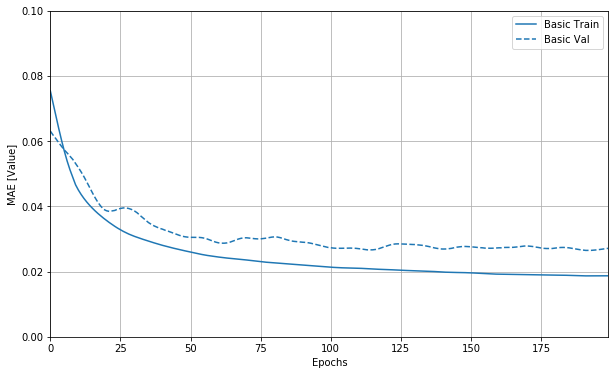

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, .1])
plt.ylabel('MAE [Value]')

Text(0, 0.5, 'MSE [MPG^2]')

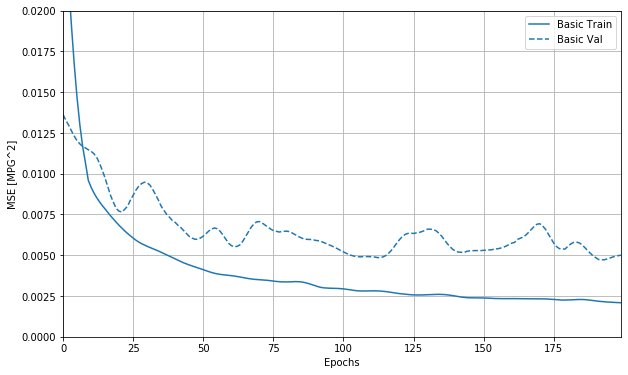

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 0.02])
plt.ylabel('MSE [MPG^2]')

> This graph shows little improvement, or even degradation in the validation error after about 100 epochs. Let's update the model.fit call to automatically stop training when the validation score doesn't improve. We'll use an EarlyStopping callback that tests a training condition for every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

### 5. Performe the Neural Network model in order to take in account the overfiting problem

In [15]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(X_train, y_train, 
                          epochs=epochs, validation_split = 0.2, verbose=0, 
                          callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0603,  mae:0.1210,  mse:0.0603,  val_loss:0.0535,  val_mae:0.1205,  val_mse:0.0535,  
.........................

In [16]:
hist = pd.DataFrame(early_history.history)
hist['epoch'] = early_history.epoch
hist.tail()

loss       mae       mse  val_loss   val_mae   val_mse  epoch
20  0.006477  0.034997  0.006477  0.031511  0.090371  0.031511     20
21  0.005908  0.034360  0.005908  0.006389  0.042925  0.006389     21
22  0.006331  0.033653  0.006331  0.018906  0.057744  0.018906     22
23  0.005829  0.033349  0.005829  0.008812  0.038774  0.008812     23
24  0.005752  0.033488  0.005752  0.006703  0.033185  0.006703     24

Text(0, 0.5, 'MAE [Value]')

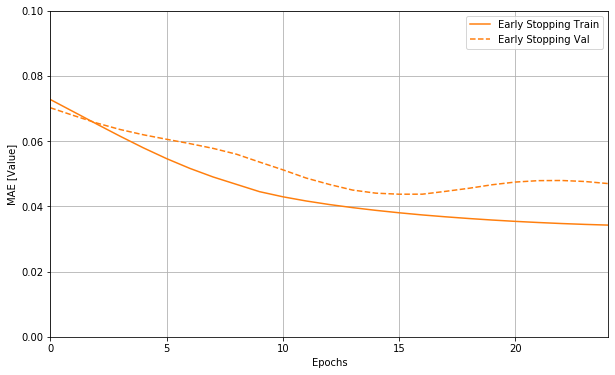

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, .1])
plt.ylabel('MAE [Value]')

Text(0, 0.5, 'MSE [Value]')

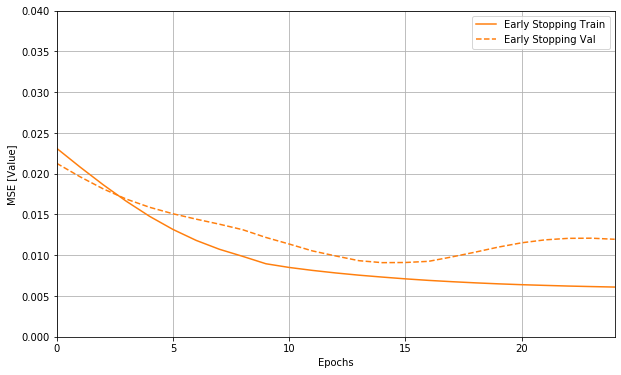

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

plotter.plot({'Early Stopping': early_history}, metric = "mse")
plt.ylim([0, .04])
plt.ylabel('MSE [Value]')

### 6. Evaluation of the Neural Network model

In [21]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print()
print("What's the performance of our model")
pd.Series([loss, mae, mse], index=['loss', 'mae', 'mse'])

3329/3329 - 0s - loss: 0.0061 - mae: 0.0311 - mse: 0.0061

What's the performance of our model


loss    0.006059
mae     0.031115
mse     0.006059
dtype: float64

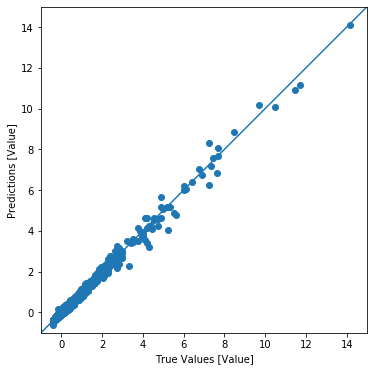

In [22]:
y_pred = model.predict(X_test).flatten()

fig, ax = plt.subplots(figsize=(10,6))

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [Value]')
plt.ylabel('Predictions [Value]')
lims = [-1, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


It looks like our model predicts reasonably well. Let's take a look at the error distribution.

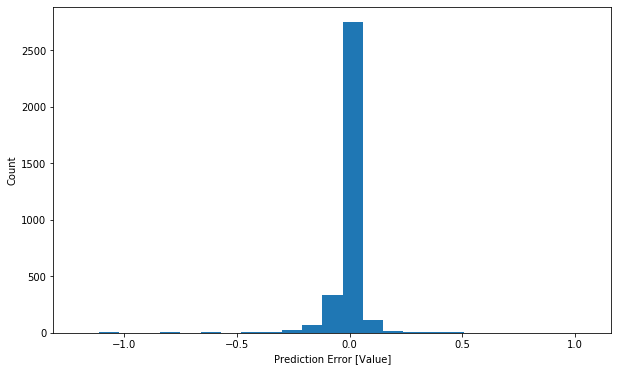

In [23]:
fig, ax = plt.subplots(figsize=(10,6))

error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Value]")
_ = plt.ylabel("Count")

# IX. Models Comparison: Which is the best one ?
- In each model, we use a Cross-Validation with 10-Folders from our original dataset. And each folder is splited in training and testing sample. 
- We store the corresponding `score`, `mae`, and `mse`. The values are used in a graph to make the comparison between the methods.
- Models
    * RandomForestRegressor,
    * BaggingRegressor,
    * KNeighborsRegressor, 
    * Support Vector Regression

In [1]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict

from sklearn.utils import shuffle

from sklearn.svm import SVR
from sklearn import neighbors


In [2]:
def normalize(x):
    """
    Standardize features by removing the mean and scaling to unit variance
    We get the same result when we use the Sklern function: StandardScaler()
    """
    scaled_x = (x-x.mean(axis=0))/x.std(axis=0)
    return scaled_x


ir_fifa = pd.read_csv('ir_fifa.csv')
X = normalize(ir_fifa.drop(['name','value'], axis=1)).values
y = normalize(ir_fifa.value).values


In [3]:
# Split the data in 1à-folders  using `Cross-Validation`
cv = KFold(n_splits=10, random_state=42, shuffle=True)

### 1. RandomForestRegressor

In [4]:
scores_forest = []
mse_forest = []
mae_forest = []

rand_forest = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=3, random_state=42)

for train_index, test_index in cv.split(X):
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    rand_forest.fit(X_train, y_train)
    
    scores_forest.append(rand_forest.score(X_test, y_test))
    mse_forest.append(mean_squared_error(y_test, rand_forest.predict(X_test)))
    mae_forest.append(mean_absolute_error(y_test, rand_forest.predict(X_test)))


In [5]:
print('Mean of RF Score', np.mean(scores_forest))
print('Mean of RF MSE', np.mean(mse_forest))
print('Mean of RF MAE', np.mean(mae_forest))

Mean of RF Score 0.9721506414571482
Mean of RF MSE 0.02807156431290365
Mean of RF MAE 0.08789187763046843


### 2. BaggingRegressor

In [6]:
scores_bag = []
mse_bag = []
mae_bag = []

bagging_reg = BaggingRegressor(n_estimators=10, bootstrap=True, random_state=42)

for train_index, test_index in cv.split(X):
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    bagging_reg.fit(X_train, y_train)
    
    scores_bag.append(bagging_reg.score(X_test, y_test))
    mse_bag.append(mean_squared_error(y_test, bagging_reg.predict(X_test)))
    mae_bag.append(mean_absolute_error(y_test, bagging_reg.predict(X_test)))

In [7]:
print('Mean of Bag Score', np.mean(scores_bag))
print('Mean of Bag MSE', np.mean(mse_bag))
print('Mean of Bag MAE', np.mean(mae_bag))

Mean of Bag Score 0.9911177520455896
Mean of Bag MSE 0.009189051395856143
Mean of Bag MAE 0.025798760989665076


### 3. Support Vector Regression

In [8]:
scores_svr = []
mse_svr = []
mae_svr = []

svr_linear = SVR(kernel='linear', gamma='auto', C=3, tol=0.001, epsilon=.1)

for train_index, test_index in cv.split(X):
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    svr_linear.fit(X_train, y_train)
    
    scores_svr.append(svr_linear.score(X_test, y_test))
    mse_svr.append(mean_squared_error(y_test, svr_linear.predict(X_test)))
    mae_svr.append(mean_absolute_error(y_test, svr_linear.predict(X_test)))


In [9]:
print('Mean of SVR Score', np.mean(scores_svr))
print('Mean of SVR MSE', np.mean(mse_svr))
print('Mean of SVR MAE', np.mean(mae_svr))

Mean of SVR Score 0.9890226503251276
Mean of SVR MSE 0.010868584442058845
Mean of SVR MAE 0.05263027439731718


### 4. KNeighborsRegressor

In [10]:
scores_knn = []
mse_knn = []
mae_knn = []

knn_model = neighbors.KNeighborsRegressor(n_neighbors = 5)

for train_index, test_index in cv.split(X):
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    knn_model.fit(X_train, y_train)
    
    scores_knn.append(knn_model.score(X_test, y_test))
    mse_knn.append(mean_squared_error(y_test, knn_model.predict(X_test)))
    mae_knn.append(mean_absolute_error(y_test, knn_model.predict(X_test)))

In [11]:
print('Mean of KNN Score', np.mean(scores_knn))
print('Mean of KNN MSE', np.mean(mse_knn))
print('Mean of KNN MAE', np.mean(mae_knn))

Mean of KNN Score 0.96132245900774
Mean of KNN MSE 0.03832749910048979
Mean of KNN MAE 0.07548792389366452


### 5. Comparison using Graphs

In [19]:
def plot(df, columns, title):
    fig, ax = plt.subplots(figsize=(12,6))
    plt.style.use('seaborn-darkgrid')
    palette = plt.get_cmap('Set1')

    num = 0
    for name in columns:
        num+=1
        plt.plot(range(10), df[name], linestyle='dashed', marker='o', color=palette(num), markersize=10, label=name);

        plt.title(title, fontsize=26);
        plt.legend(loc=2, ncol=2)

    return plt.show()

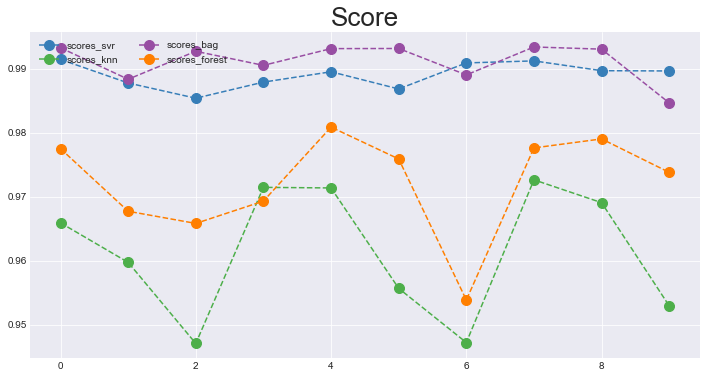

In [20]:
# Score plot
names = ['scores_svr', 'scores_knn', 'scores_bag', 'scores_forest']
df_scores = pd.DataFrame([scores_svr, scores_knn, scores_bag, scores_forest],
                         index=names).T

plot(df_scores, names, 'Score')


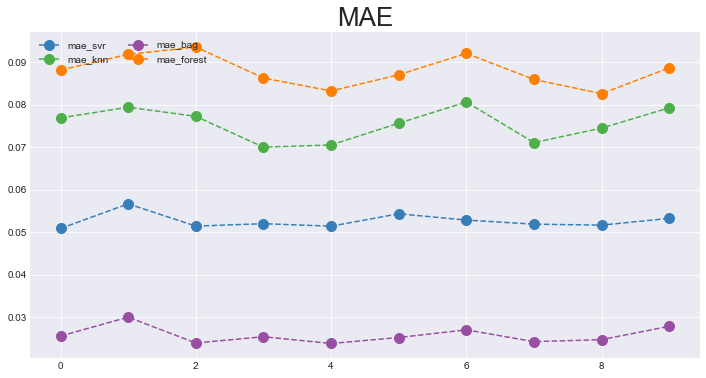

In [21]:
# MAE plot
names = ['mae_svr', 'mae_knn', 'mae_bag', 'mae_forest']

df_mae = pd.DataFrame([mae_svr, mae_knn, mae_bag, mae_forest],
                      index=names).T
plot(df_mae, names, 'MAE')

- First, we see that the `BaggingRegressor` and `Support Vector Regression` have the lower `Mean Absolute Error` in each the 10 folders. 
- `BaggingRegressor` and `KNeighborsRegresson` have the larger `score` in each the 10 folders.

The best method is which have the the `lower bias` and `lower variance`!!! In the graph, you can see that the `BaggingRegressor` is the best (See the report for more the interpretation).